# Steam EDA

In [1]:
import pandas as pd
import numpy as np

# standard library imports
import csv
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

import joblib

# customisations - ensure tables show all columns
pd.set_option("max_columns", 100)
#pd.options.plotting.backend = "plotly"

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#setting seaborn
sns.set_theme(style='whitegrid', font_scale=1.5)

### EDA of Games Dataset

Reading in cleaned dataset with joblib  as it preserves pandas dataframe format

In [2]:
gamedf = joblib.load('data/clean_game_data.joblib')

### Tidying up categories and genres

There are a lot of categories (player modes) and also genres - will need to define a way to group these

Some of these, eg 'Steam Achievements' and 'Controller Support' can already be seen in other columns

Will crosscheck these to make sure they have been accounted for, eg if it says controller support is available then the controller support column should have a 1

In [3]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [4]:
to_1D(gamedf['categories']).value_counts()

Single-player                         55100
Steam Achievements                    31207
Steam Cloud                           18122
Downloadable Content                  17364
Multi-player                          15562
                                      ...  
Compat. manette : partielle               1
Koop                                      1
Online-PvP                                1
Supporto completo per i controller        1
Cooperativo                               1
Length: 87, dtype: int64

In [5]:
cats = to_1D(gamedf['categories'])

In [6]:
print(cats.unique())

['Multi-player' 'PvP' 'Online PvP' 'Shared/Split Screen PvP'
 'Valve Anti-Cheat enabled' 'Remote Play Together' 'Single-player'
 'Steam Cloud' 'Remote Play on Phone' 'Remote Play on Tablet'
 'Steam Achievements' 'Steam Trading Cards' 'Captions available'
 'Partial Controller Support' 'Includes Source SDK'
 'Cross-Platform Multiplayer' 'Stats' 'Commentary available'
 'Includes level editor' 'Steam Workshop' 'In-App Purchases' 'Co-op'
 'Full controller support' 'Steam Leaderboards' 'Remote Play on TV'
 'Online Co-op' 'SteamVR Collectibles' 'Shared/Split Screen Co-op'
 'Shared/Split Screen' 'Downloadable Content' 'LAN PvP' 'LAN Co-op' 'MMO'
 'Un jugador' 'Multijugador' 'VR Support' 'Mods' 'Mods (require HL2)'
 'Steam Turn Notifications' 'Režim pro jednoho hráče'
 'Režim pro více hráčů' 'PvP na sdílené/rozdělené obrazovce' 'Kooperace'
 'Kooperace na sdílené/rozdělené obrazovce' 'Sdílená/Rozdělená obrazovka'
 'Achievementy' 'Plná podpora ovladače' 'Sběratelské karty' 'Statistiky'
 'Žebříčky

#### First I will create a dataframe that will turn each unique category into a boolean column -  each value in categories is assigned to its own column with a 1 if it contains else 0

In [7]:
def boolean_df(item_lists, unique_items):
    """Returns boolean df of items"""

    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [8]:
cat_bool = boolean_df(gamedf['categories'], cats.unique())

In [9]:
cat_bool.head()

,Multi-player,PvP,Online PvP,Shared/Split Screen PvP,Valve Anti-Cheat enabled,Remote Play Together,Single-player,Steam Cloud,Remote Play on Phone,Remote Play on Tablet,Steam Achievements,Steam Trading Cards,Captions available,Partial Controller Support,Includes Source SDK,Cross-Platform Multiplayer,Stats,Commentary available,Includes level editor,Steam Workshop,In-App Purchases,Co-op,Full controller support,Steam Leaderboards,Remote Play on TV,Online Co-op,SteamVR Collectibles,Shared/Split Screen Co-op,Shared/Split Screen,Downloadable Content,LAN PvP,LAN Co-op,MMO,Un jugador,Multijugador,VR Support,Mods,Mods (require HL2),Steam Turn Notifications,Režim pro jednoho hráče,Režim pro více hráčů,PvP na sdílené/rozdělené obrazovce,Kooperace,Kooperace na sdílené/rozdělené obrazovce,Sdílená/Rozdělená obrazovka,Achievementy,Plná podpora ovladače,Sběratelské karty,Statistiky,Žebříčky služby Steam,Remote Play na telefonu,Remote Play na tabletu,Remote Play na TV,Un joueur,Succès Steam,Cartes à échanger Steam,Compat. manette : partielle,Remote Play sur téléphone,Remote Play sur tablette,Einzelspieler,Mehrspieler,Online-PvP,PvP-Spiele mit geteiltem Bildschirm,Koop,Online-Koop,Käufe im Spiel,Steam-Errungenschaften,Volle Controllerunterstützung,Steam-Sammelkarten,Remote Play auf Smartphones,Remote Play auf Tablets,Remote Play auf TV-Geräten,Logros de Steam,Compat. total con mando,Cromos de Steam,Remote Play en tableta,Remote Play en TV,Um jogador,Multijogador,Cooperativo,Cooperativo online,Conquistas Steam,Compras em aplicativo,Remote Play no celular,Remote Play no tablet,Giocatore singolo,Supporto completo per i controller
0,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

Summing up the boolean cats we can see there are a lot of categories with just 1 value but in different languages

In [10]:
cat_bool.select_dtypes(include=['bool']).sum(axis=0)

Multi-player                          15562
PvP                                    7571
Online PvP                             7363
Shared/Split Screen PvP                4077
Valve Anti-Cheat enabled                364
                                      ...  
Compras em aplicativo                     1
Remote Play no celular                    1
Remote Play no tablet                     1
Giocatore singolo                         1
Supporto completo per i controller        1
Length: 87, dtype: int64

In [11]:
cat_bool[cat_bool.columns[cat_bool.sum(axis=0)<5]] #52 columns with less than 5 - drop these

,Un jugador,Multijugador,Mods,Mods (require HL2),Režim pro jednoho hráče,Režim pro více hráčů,PvP na sdílené/rozdělené obrazovce,Kooperace,Kooperace na sdílené/rozdělené obrazovce,Sdílená/Rozdělená obrazovka,Achievementy,Plná podpora ovladače,Sběratelské karty,Statistiky,Žebříčky služby Steam,Remote Play na telefonu,Remote Play na tabletu,Remote Play na TV,Un joueur,Succès Steam,Cartes à échanger Steam,Compat. manette : partielle,Remote Play sur téléphone,Remote Play sur tablette,Einzelspieler,Mehrspieler,Online-PvP,PvP-Spiele mit geteiltem Bildschirm,Koop,Online-Koop,Käufe im Spiel,Steam-Errungenschaften,Volle Controllerunterstützung,Steam-Sammelkarten,Remote Play auf Smartphones,Remote Play auf Tablets,Remote Play auf TV-Geräten,Logros de Steam,Compat. total con mando,Cromos de Steam,Remote Play en tableta,Remote Play en TV,Um jogador,Multijogador,Cooperativo,Cooperativo online,Conquistas Steam,Compras em aplicativo,Remote Play no celular,Remote Play no tablet,Giocatore singolo,Supporto completo per i controller
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59650,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
59651,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
59652,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
59653,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [12]:
cat_bool = cat_bool[cat_bool.columns[cat_bool.sum(axis=0)>5]] 

In [13]:
cat_bool.columns

Index(['Multi-player', 'PvP', 'Online PvP', 'Shared/Split Screen PvP',
       'Valve Anti-Cheat enabled', 'Remote Play Together', 'Single-player',
       'Steam Cloud', 'Remote Play on Phone', 'Remote Play on Tablet',
       'Steam Achievements', 'Steam Trading Cards', 'Captions available',
       'Partial Controller Support', 'Includes Source SDK',
       'Cross-Platform Multiplayer', 'Stats', 'Commentary available',
       'Includes level editor', 'Steam Workshop', 'In-App Purchases', 'Co-op',
       'Full controller support', 'Steam Leaderboards', 'Remote Play on TV',
       'Online Co-op', 'SteamVR Collectibles', 'Shared/Split Screen Co-op',
       'Shared/Split Screen', 'Downloadable Content', 'LAN PvP', 'LAN Co-op',
       'MMO', 'VR Support', 'Steam Turn Notifications'],
      dtype='object')

In [14]:
cat_freq = pd.DataFrame(np.dot(cat_bool.astype(int).T, cat_bool.astype(int)), columns = cat_bool.columns, index = cat_bool.columns)

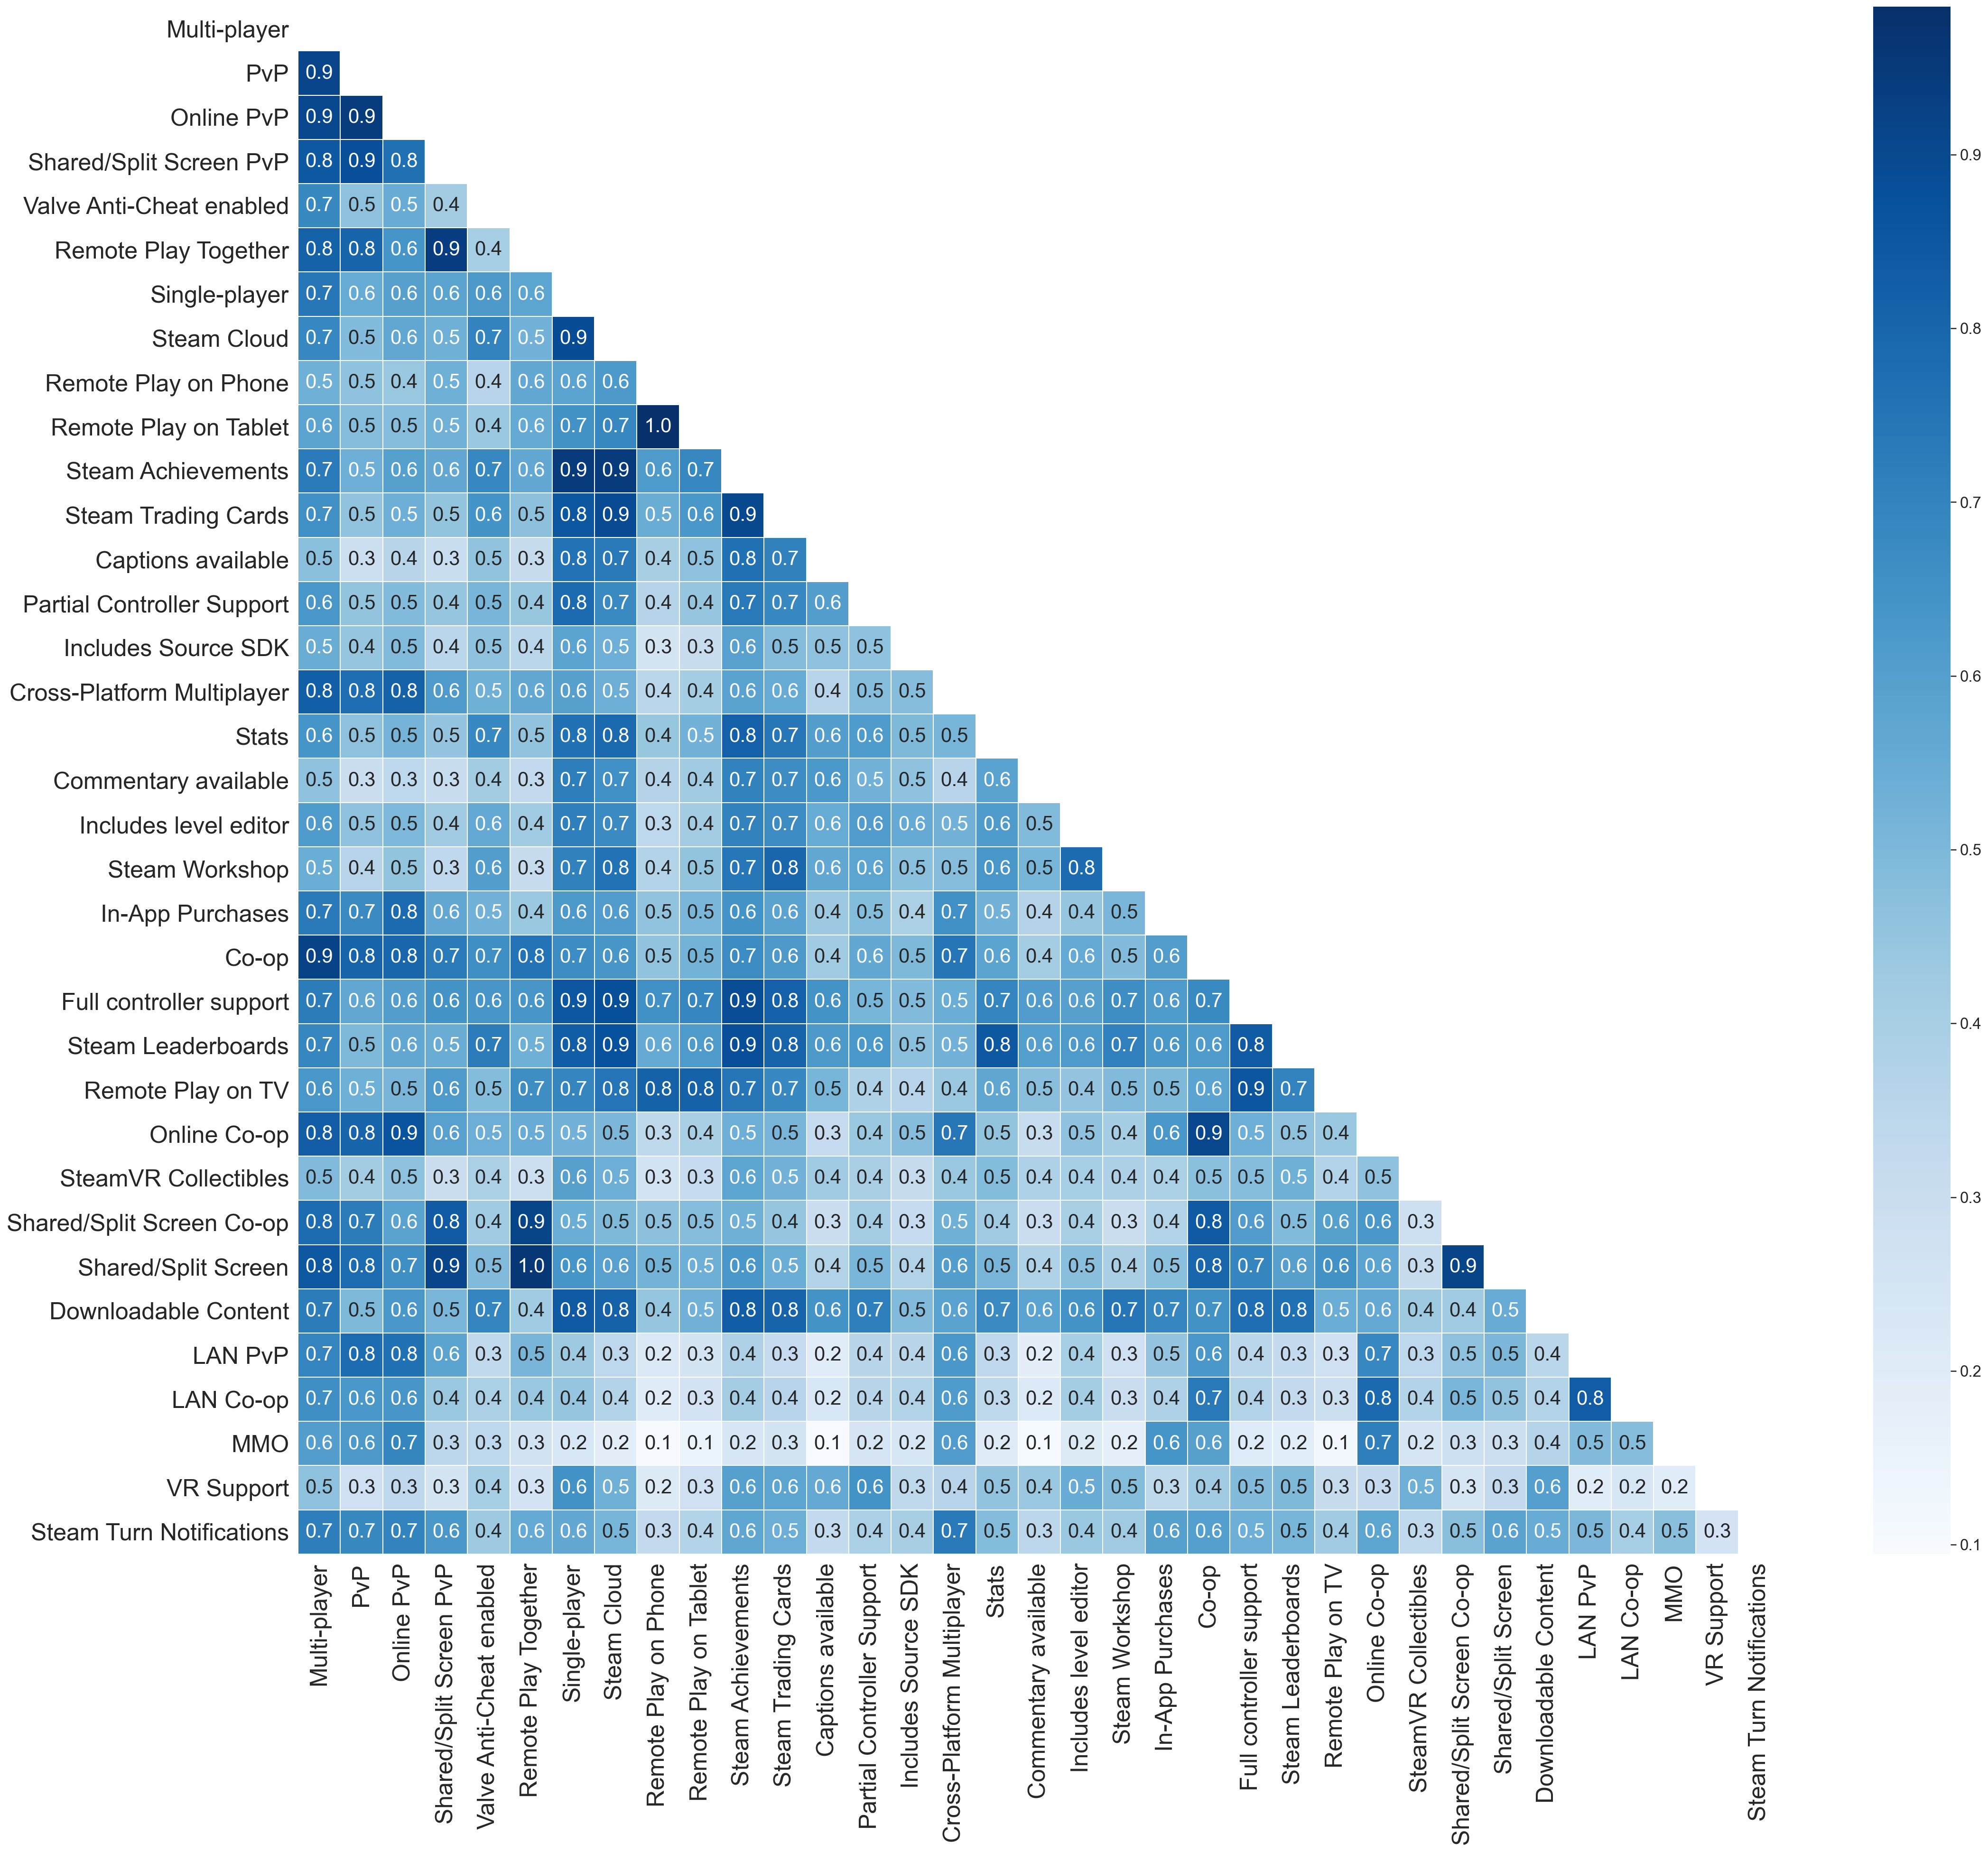

In [15]:
fig, ax = plt.subplots(figsize = (35,30))
mask = np.zeros_like(cat_freq.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cat_freq.corr(),mask=mask, cmap = "Blues", annot=True, fmt='.1f', linewidths = 0.5, annot_kws={"size": 21})

plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=25)
plt.show()
#plt.savefig("heatmap.png", dpi = 300)

In [16]:
with np.printoptions(threshold=np.inf):
    print(cat_bool.select_dtypes(include=['bool']).sum(axis=0))

Multi-player                  15562
PvP                            7571
Online PvP                     7363
Shared/Split Screen PvP        4077
Valve Anti-Cheat enabled        364
Remote Play Together           4534
Single-player                 55100
Steam Cloud                   18122
Remote Play on Phone            793
Remote Play on Tablet          1041
Steam Achievements            31207
Steam Trading Cards           14578
Captions available             1327
Partial Controller Support    10297
Includes Source SDK              66
Cross-Platform Multiplayer     2356
Stats                          3712
Commentary available            255
Includes level editor          2187
Steam Workshop                 3239
In-App Purchases               2694
Co-op                          7298
Full controller support       14342
Steam Leaderboards             8090
Remote Play on TV              2058
Online Co-op                   3689
SteamVR Collectibles             42
Shared/Split Screen Co-op   

Drop unneccesary columns

In [17]:
cat_bool.drop(columns = ['Steam Cloud', 'Steam Trading Cards', 'Captions available', 'Includes Source SDK',
             'Commentary available', 'Includes level editor', 'Steam Leaderboards', 'SteamVR Collectibles', 
              'Steam Turn Notifications', 'Stats', 'Steam Workshop', 'Valve Anti-Cheat enabled'], inplace=True)

In [18]:
with np.printoptions(threshold=np.inf):
    print(cat_bool.select_dtypes(include=['bool']).sum(axis=0))

Multi-player                  15562
PvP                            7571
Online PvP                     7363
Shared/Split Screen PvP        4077
Remote Play Together           4534
Single-player                 55100
Remote Play on Phone            793
Remote Play on Tablet          1041
Steam Achievements            31207
Partial Controller Support    10297
Cross-Platform Multiplayer     2356
In-App Purchases               2694
Co-op                          7298
Full controller support       14342
Remote Play on TV              2058
Online Co-op                   3689
Shared/Split Screen Co-op      2439
Shared/Split Screen            5101
Downloadable Content          17364
LAN PvP                         342
LAN Co-op                       287
MMO                            1153
VR Support                      400
dtype: int64


### Combine columns together

- `Multi-player` - Cross-Platform Multiplayer, MMO, Shared/Split Screen,
- `PvP` = Online PvP, Shared/Split Screen PvP, LAN PvP  
- `Co-op` = Online Co-op, Shared/Split Screen Co-op ,  LAN Co-op   
- `Controller_support` = Partial Controller Support, Full controller support 
- `Remote_play (this is also coop and multiplayer)` = Remote Play Together, Remote Play on Tablet, Remote Play on Phone, Remote Play on TV) 
  

Co-op is a subcategory or game mode of Multiplayer. Multiplayer covers all games where you are more than one player. Co-op is short for cooperative and refers to a multiplayer game where you play together with other players to complete a common goal against a non-player enemy.

In [19]:
cat_bool['Multi-player']=np.where(cat_bool['Multi-player'],cat_bool['Multi-player'],cat_bool['Cross-Platform Multiplayer'])
cat_bool['Multi-player']=np.where(cat_bool['Multi-player'],cat_bool['Multi-player'],cat_bool['MMO'])
cat_bool['PvP']=np.where(cat_bool['PvP'],cat_bool['PvP'],cat_bool['Online PvP'])
cat_bool['PvP']=np.where(cat_bool['PvP'],cat_bool['PvP'],cat_bool['Shared/Split Screen PvP'])
cat_bool['PvP']=np.where(cat_bool['PvP'],cat_bool['PvP'],cat_bool['LAN PvP'])
cat_bool['Co-op']=np.where(cat_bool['Co-op'],cat_bool['Co-op'],cat_bool['Online Co-op'])
cat_bool['Co-op']=np.where(cat_bool['Co-op'],cat_bool['Co-op'],cat_bool['Shared/Split Screen Co-op'])
cat_bool['Co-op']=np.where(cat_bool['Co-op'],cat_bool['Co-op'],cat_bool['LAN Co-op'])
cat_bool['Multi-player']=np.where(cat_bool['Multi-player'],cat_bool['Multi-player'],cat_bool['Shared/Split Screen'])
cat_bool['Partial Controller Support']=np.where(cat_bool['Partial Controller Support'],cat_bool['Partial Controller Support'],cat_bool['Full controller support'])
cat_bool['Remote Play Together']=np.where(cat_bool['Remote Play Together'],cat_bool['Remote Play Together'],cat_bool['Remote Play on Tablet'])
cat_bool['Remote Play Together']=np.where(cat_bool['Remote Play Together'],cat_bool['Remote Play Together'],cat_bool['Remote Play on Phone'])
cat_bool['Remote Play Together']=np.where(cat_bool['Remote Play Together'],cat_bool['Remote Play Together'],cat_bool['Remote Play on TV'])

In [20]:
cat_bool.drop(columns = ['Online PvP','Shared/Split Screen PvP', 'LAN PvP', 'Online Co-op',
                         'Shared/Split Screen Co-op', 'LAN Co-op', 'Shared/Split Screen','Full controller support',
                         'Remote Play on Tablet', 'Remote Play on Phone', 'Remote Play on TV',
                         'MMO', 'Cross-Platform Multiplayer'], inplace=True)

In [21]:
cat_bool.rename(columns={'Partial Controller Support': 'Controller_support', 'Remote Play Together': 'Remote_play'}, inplace=True)

In [22]:
cat_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59655 entries, 0 to 59654
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Multi-player          59655 non-null  bool 
 1   PvP                   59655 non-null  bool 
 2   Remote_play           59655 non-null  bool 
 3   Single-player         59655 non-null  bool 
 4   Steam Achievements    59655 non-null  bool 
 5   Controller_support    59655 non-null  bool 
 6   In-App Purchases      59655 non-null  bool 
 7   Co-op                 59655 non-null  bool 
 8   Downloadable Content  59655 non-null  bool 
 9   VR Support            59655 non-null  bool 
dtypes: bool(10)
memory usage: 582.7 KB


In [23]:
cat_bool.head()

,Multi-player,PvP,Remote_play,Single-player,Steam Achievements,Controller_support,In-App Purchases,Co-op,Downloadable Content,VR Support
0,True,True,False,False,False,False,False,False,False,False
1,True,True,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,False,False,False,False
4,True,False,True,True,False,False,False,False,False,False


### Visualisation of Game Categories

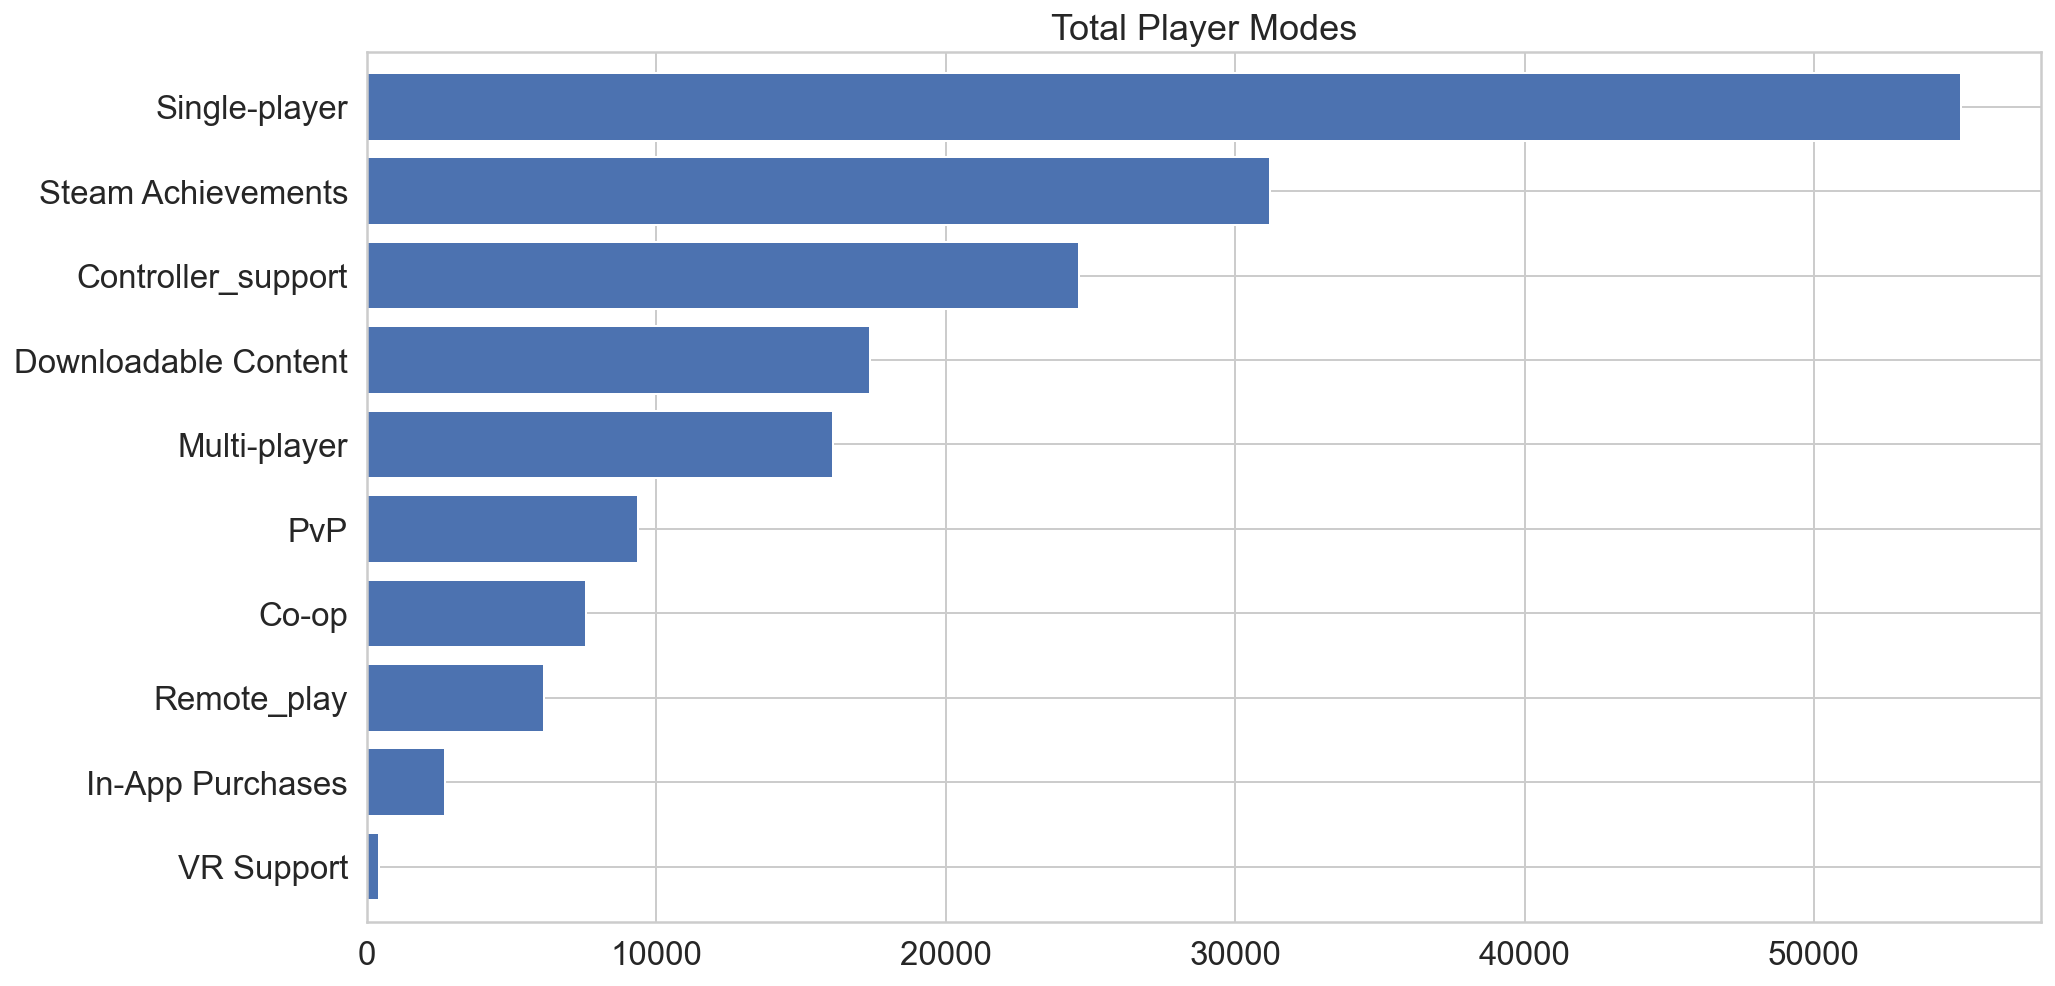

In [24]:
cat_bool.select_dtypes(include=['bool']).sum(axis=0).sort_values().plot(kind="barh", figsize=(15,8), width=0.8)
plt.title("Total Player Modes")
plt.show()
#plt.savefig("game_cats_plot.png", dpi = 300, bbox_inches = "tight")

In [25]:
gamedf = pd.concat([gamedf, cat_bool], axis=1)

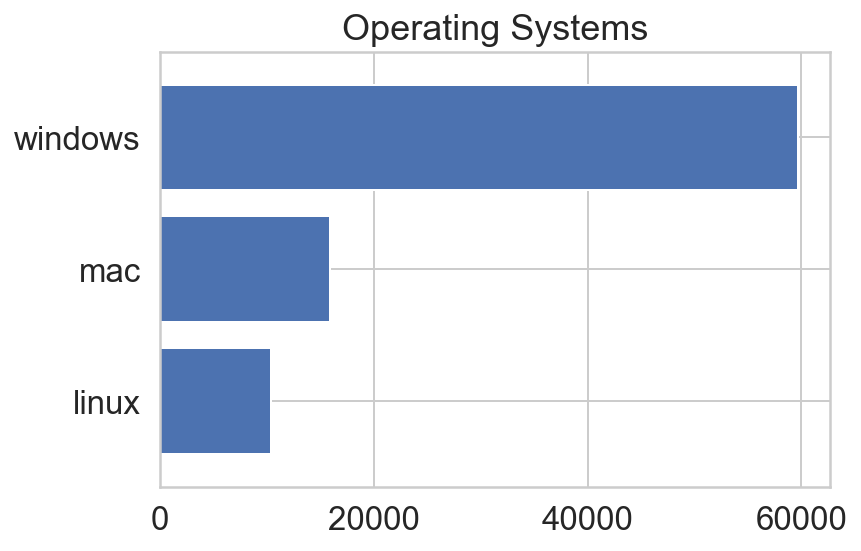

In [26]:
gamedf[['windows', 'linux', 'mac']].sum(axis=0).sort_values().plot(kind='barh', width=0.8)
plt.title("Operating Systems")
plt.show()

In [27]:
gamedf['controller_support']=np.where(gamedf['controller_support'],gamedf['controller_support'],gamedf['Controller_support'])
gamedf.drop(columns = 'Controller_support', inplace=True)

In [28]:
genres = to_1D(gamedf['genres'])
genres.value_counts()

Indie                    37172
Action                   25055
Casual                   20708
Adventure                19685
Simulation               13281
Strategy                 11601
RPG                      10288
Early Access              4728
Free to Play              4658
Sports                    3081
Racing                    2425
Massively Multiplayer     1814
Design & Illustration     1233
Web Publishing            1138
Violent                    733
Utilities                  475
Gore                       440
Animation & Modeling       349
Nudity                     287
Education                  273
Sexual Content             265
Software Training          229
Video Production           219
Game Development           196
Photo Editing              146
Audio Production           142
Accounting                   8
Movie                        3
Aventura                     1
Estratégia                   1
Gelegenheitsspiele           1
Abenteuer                    1
Document

In [29]:
gen_bool = boolean_df(gamedf['genres'], genres.unique())

In [30]:
gen_bool.head()

,Action,Free to Play,Strategy,Adventure,Indie,RPG,Animation & Modeling,Video Production,Casual,Simulation,Racing,Massively Multiplayer,Nudity,Violent,Sports,Early Access,Design & Illustration,Education,Photo Editing,Utilities,Game Development,Gore,Web Publishing,Software Training,Audio Production,Sexual Content,Nezávislé,Movie,Accounting,Abenteuer,Gelegenheitsspiele,Acción,Aventura,Estratégia,Avventura,Free-to-Play,Documentary,Episodic,Short,Tutorial,360 Video
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
gen_bool[gen_bool.columns[gen_bool.sum(axis=0)<5]].head() 
#14 columns with less than 5 entries - drop these 

,Nezávislé,Movie,Abenteuer,Gelegenheitsspiele,Acción,Aventura,Estratégia,Avventura,Free-to-Play,Documentary,Episodic,Short,Tutorial,360 Video
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
gen_bool.shape

(59655, 41)

In [33]:
gen_bool = gen_bool[gen_bool.columns[gen_bool.sum(axis=0)>5]]

In [34]:
gen_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59655 entries, 0 to 59654
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Action                 59655 non-null  bool 
 1   Free to Play           59655 non-null  bool 
 2   Strategy               59655 non-null  bool 
 3   Adventure              59655 non-null  bool 
 4   Indie                  59655 non-null  bool 
 5   RPG                    59655 non-null  bool 
 6   Animation & Modeling   59655 non-null  bool 
 7   Video Production       59655 non-null  bool 
 8   Casual                 59655 non-null  bool 
 9   Simulation             59655 non-null  bool 
 10  Racing                 59655 non-null  bool 
 11  Massively Multiplayer  59655 non-null  bool 
 12  Nudity                 59655 non-null  bool 
 13  Violent                59655 non-null  bool 
 14  Sports                 59655 non-null  bool 
 15  Early Access           59655 non-nul

In [35]:
#Only keep game genres
gen_bool = gen_bool[['Action', 'Free to Play', 'Strategy', 'Adventure','Indie', 'RPG', 'Casual','Simulation',
                     'Racing', 'Massively Multiplayer', 'Sports', 'Early Access']]

### Visualisation of Game Genres

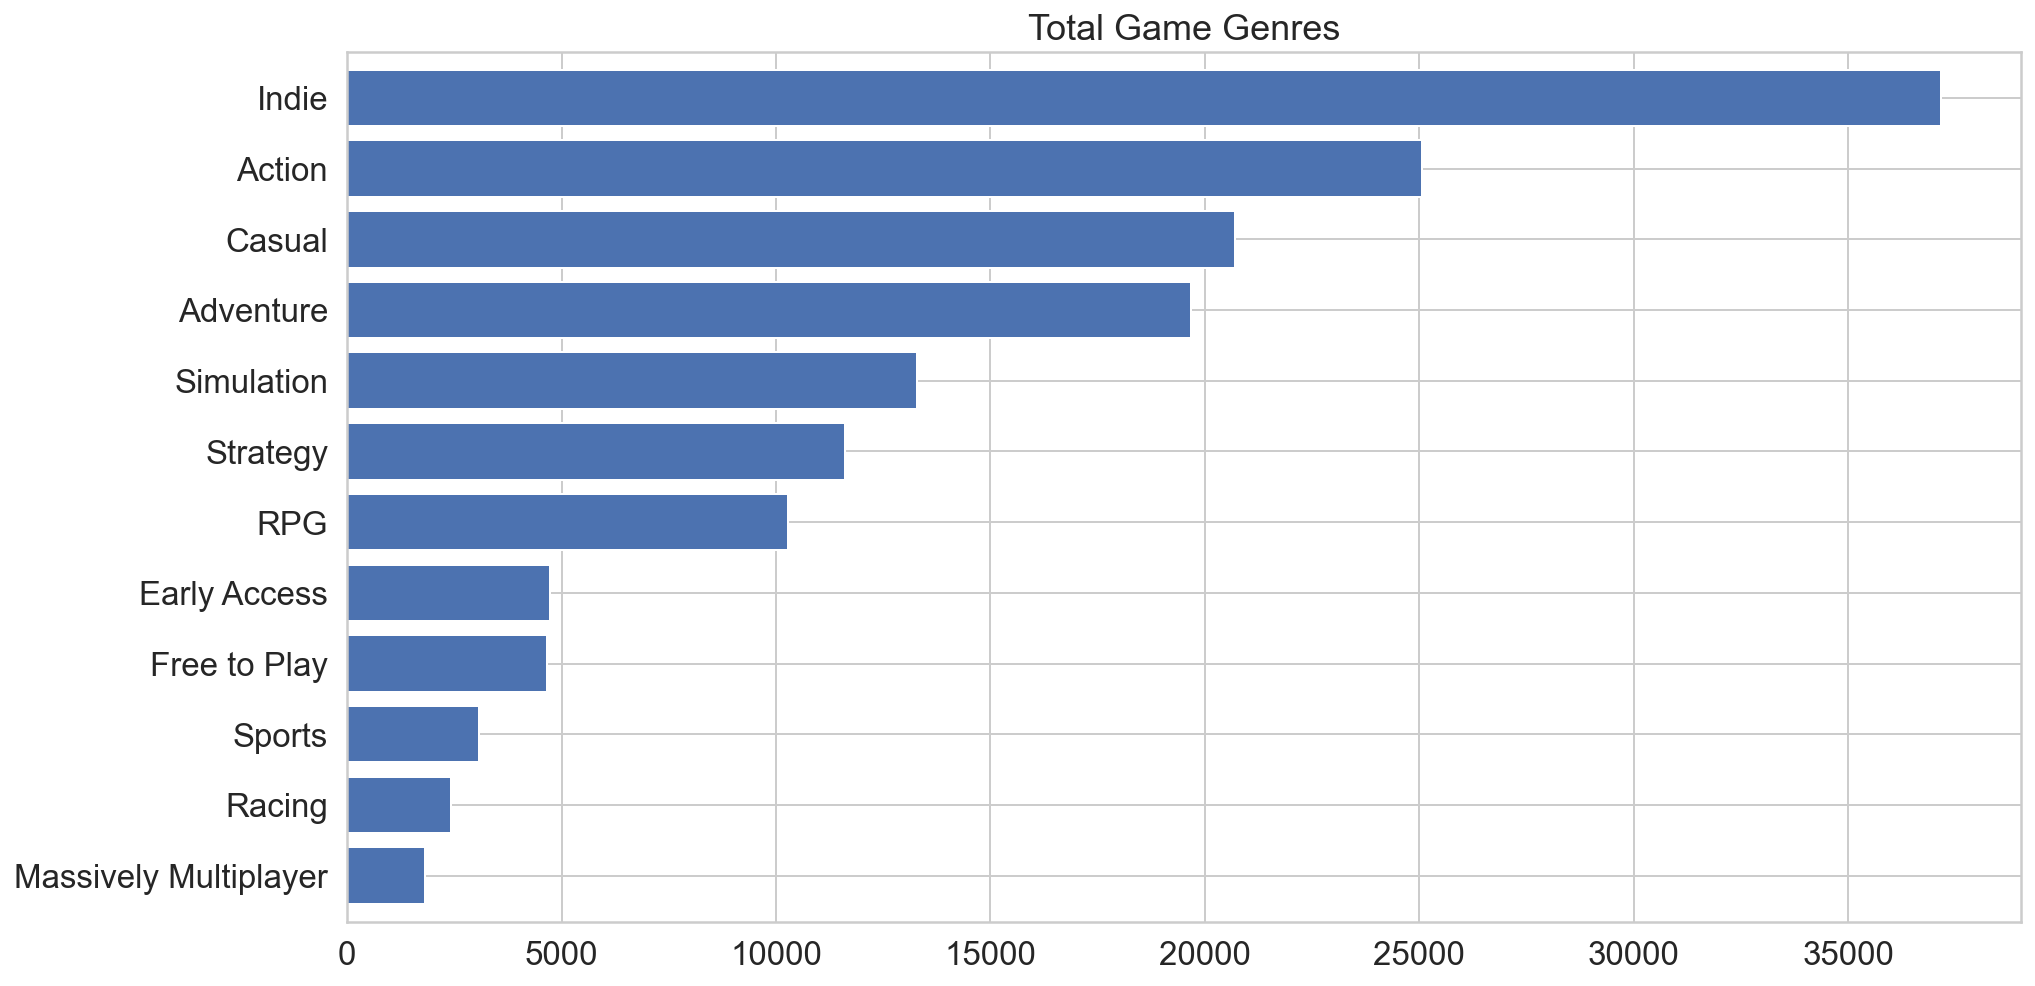

In [36]:
gen_bool.select_dtypes(include=['bool']).sum(axis=0).sort_values().plot(kind="barh", figsize=(15,8), width=0.8)
plt.title('Total Game Genres')
plt.show()
#plt.savefig("game_genres_plot.png", dpi = 300, bbox_inches = "tight")

In [37]:
gamedf = pd.concat([gamedf, gen_bool], axis=1)

In [38]:
gen_cols = ['Action', 'Free to Play', 'Strategy', 'Adventure','Indie', 'RPG', 'Casual','Simulation',
                     'Racing', 'Massively Multiplayer', 'Sports', 'Early Access']

In [39]:
gamedf['tot_gen'] = gamedf[gen_cols].sum(axis=1)

In [40]:
gamedf.tot_gen.value_counts() 
#there are 1448 columns without wanted genres(where summed columns = 0) - remove these

2     16290
3     15811
1     12676
4      8043
5      3533
0      1448
6      1288
7       374
8       138
9        32
10       11
11       10
12        1
Name: tot_gen, dtype: int64

In [41]:
gen_drop = gamedf[gamedf['tot_gen'] == 0 ].index
gamedf.drop(gen_drop, inplace=True) 
gamedf.reset_index(drop=True, inplace=True)

In [42]:
cat_cols = ['Multi-player', 'PvP', 'Remote_play', 'Single-player', 'Steam Achievements',
            'In-App Purchases', 'Co-op', 'Downloadable Content', 'VR Support']

gamedf['tot_cat'] = gamedf[cat_cols].sum(axis=1)

In [43]:
gamedf['tot_cat'].value_counts() #62 games wiht no categories

2    19635
1    16709
3     9116
4     5359
5     4836
6     2066
7      418
0       62
8        6
Name: tot_cat, dtype: int64

In [44]:
cat_drop = gamedf[gamedf['tot_cat'] == 0 ].index
gamedf.drop(cat_drop, inplace=True) 
gamedf.reset_index(drop=True, inplace=True)

In [45]:
gamedf.drop(columns=['tot_gen', 'tot_cat'], inplace=True)

keeping category and genre columns for now - turn it into a comma separated string

In [46]:
gamedf['categories'] = [','.join(map(str, l)) for l in gamedf['categories']]
gamedf['genres'] = [','.join(map(str, l)) for l in gamedf['genres']]

In [47]:
cat_cols = ['Multi-player', 'PvP', 'Remote_play', 'Single-player', 'Steam Achievements',
            'In-App Purchases', 'Co-op', 'Downloadable Content', 'VR Support']
gen_cols = ['Action', 'Free to Play', 'Strategy', 'Adventure','Indie', 'RPG', 'Casual','Simulation',
                     'Racing', 'Massively Multiplayer', 'Sports', 'Early Access']

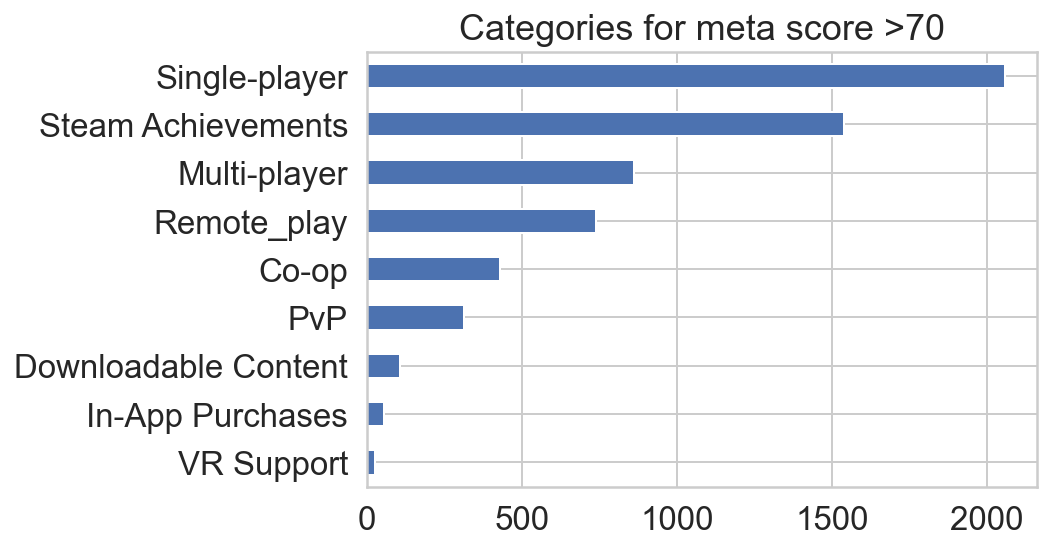

In [48]:
top_scores = gamedf[gamedf.meta_score > 70].sort_values(by = 'meta_score', ascending=False)
fig = top_scores[cat_cols].sum().sort_values().plot.barh(title = 'Categories for meta score >70')
plt.show()

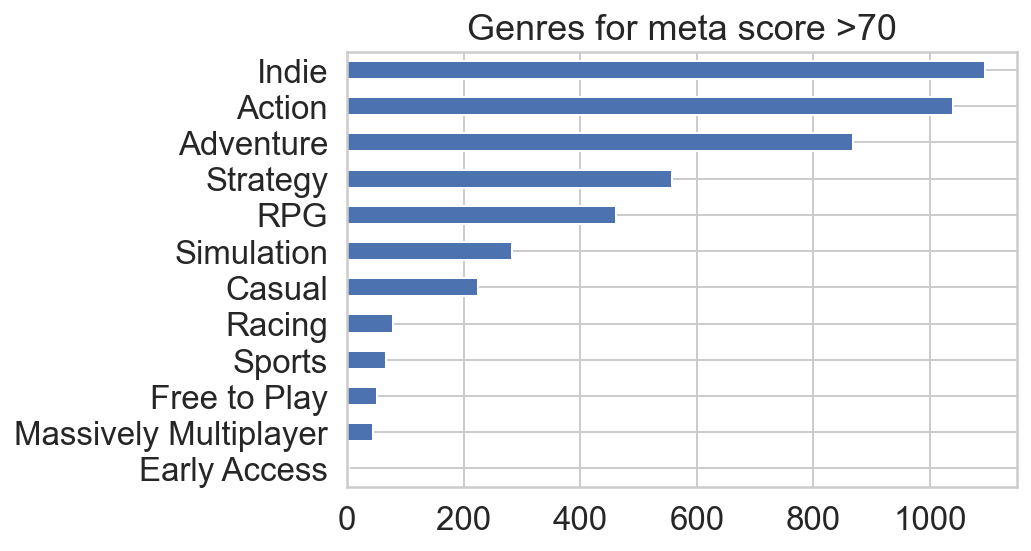

In [49]:
top_scores = gamedf[gamedf.meta_score > 70].sort_values(by = 'meta_score', ascending=False)
fig = top_scores[gen_cols].sum().sort_values().plot.barh(title = 'Genres for meta score >70')
plt.show()

### Metacritic Scores

There are not that many games which have Metacritic scores however I decided to take a closer look into the avg meta critic score per year anyway.

There is missing data from 1999, after looking into this I found that not that many pc games were reviewed on metacritic that year and none of the ones that were are active on steam.

This could possibly mean that only the best metacritic games remain on the steam store as from the cleaning I found there were a lot of delisted games, additionally we can see that the majority of the games in the store were released in the past few years.

<AxesSubplot:title={'center':'Metacritic score distribution'}, ylabel='Frequency'>

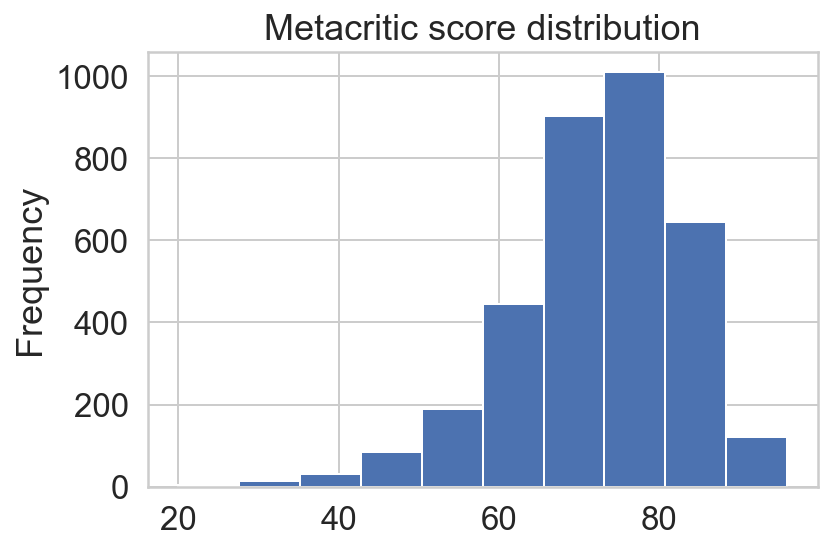

In [50]:
gamedf[gamedf.meta_score > 0].meta_score.plot.hist(title = 'Metacritic score distribution')

In [51]:
i = gamedf[gamedf['rel_date'] == '29 ENE 2008'].index
gamedf.drop(i, inplace=True)

In [52]:
i = gamedf[gamedf['rel_date'] == '8. März 2017'].index
gamedf.drop(i, inplace=True)
gamedf.reset_index(drop=True, inplace=True)

In [53]:
gamedf['rel_date'] = pd.to_datetime(gamedf['rel_date'])
gamedf['rel_year'] = gamedf['rel_date'].dt.year

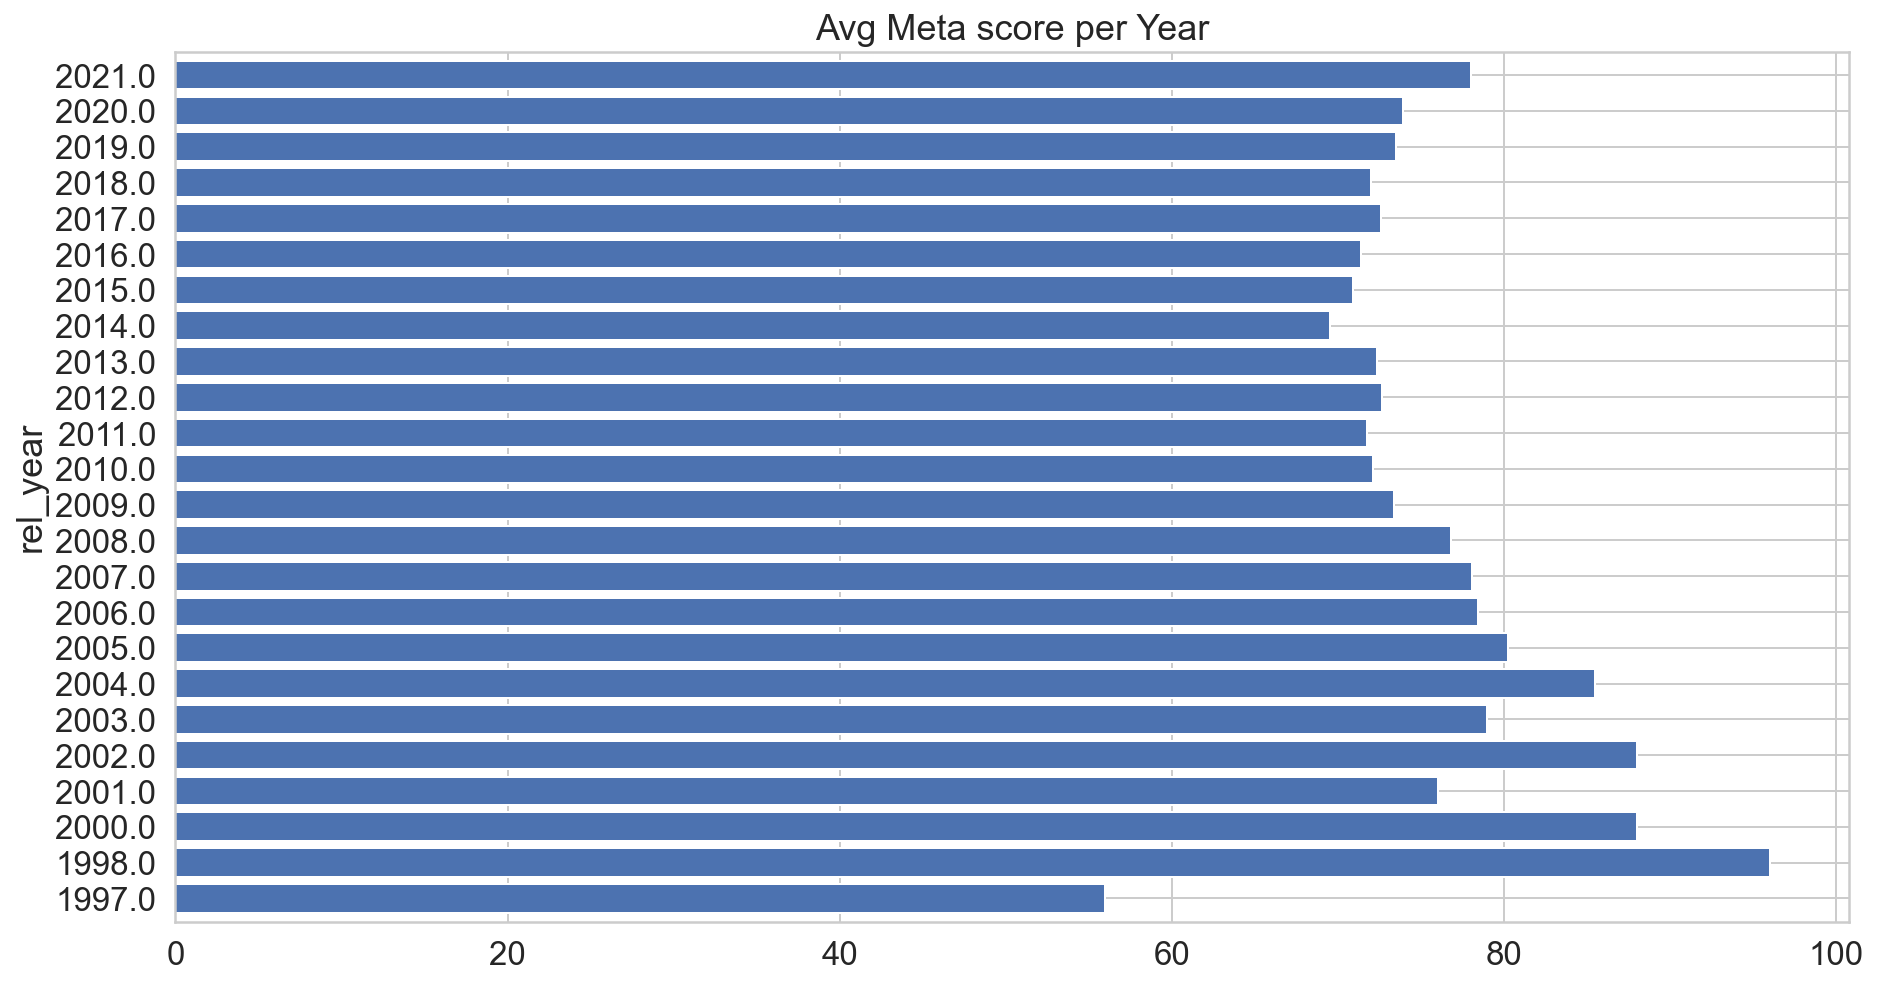

In [54]:
score_year = gamedf[gamedf.meta_score > 0].groupby('rel_year')['meta_score'].agg('mean')
score_year.plot(kind='barh', title='Avg Meta score per Year', figsize=(15,8), width=0.8)
plt.show()

In [55]:
score_year.describe()

count    24.000000
mean     76.087795
std       7.835122
min      56.000000
25%      72.087871
50%      73.700355
75%      78.580882
max      96.000000
Name: meta_score, dtype: float64

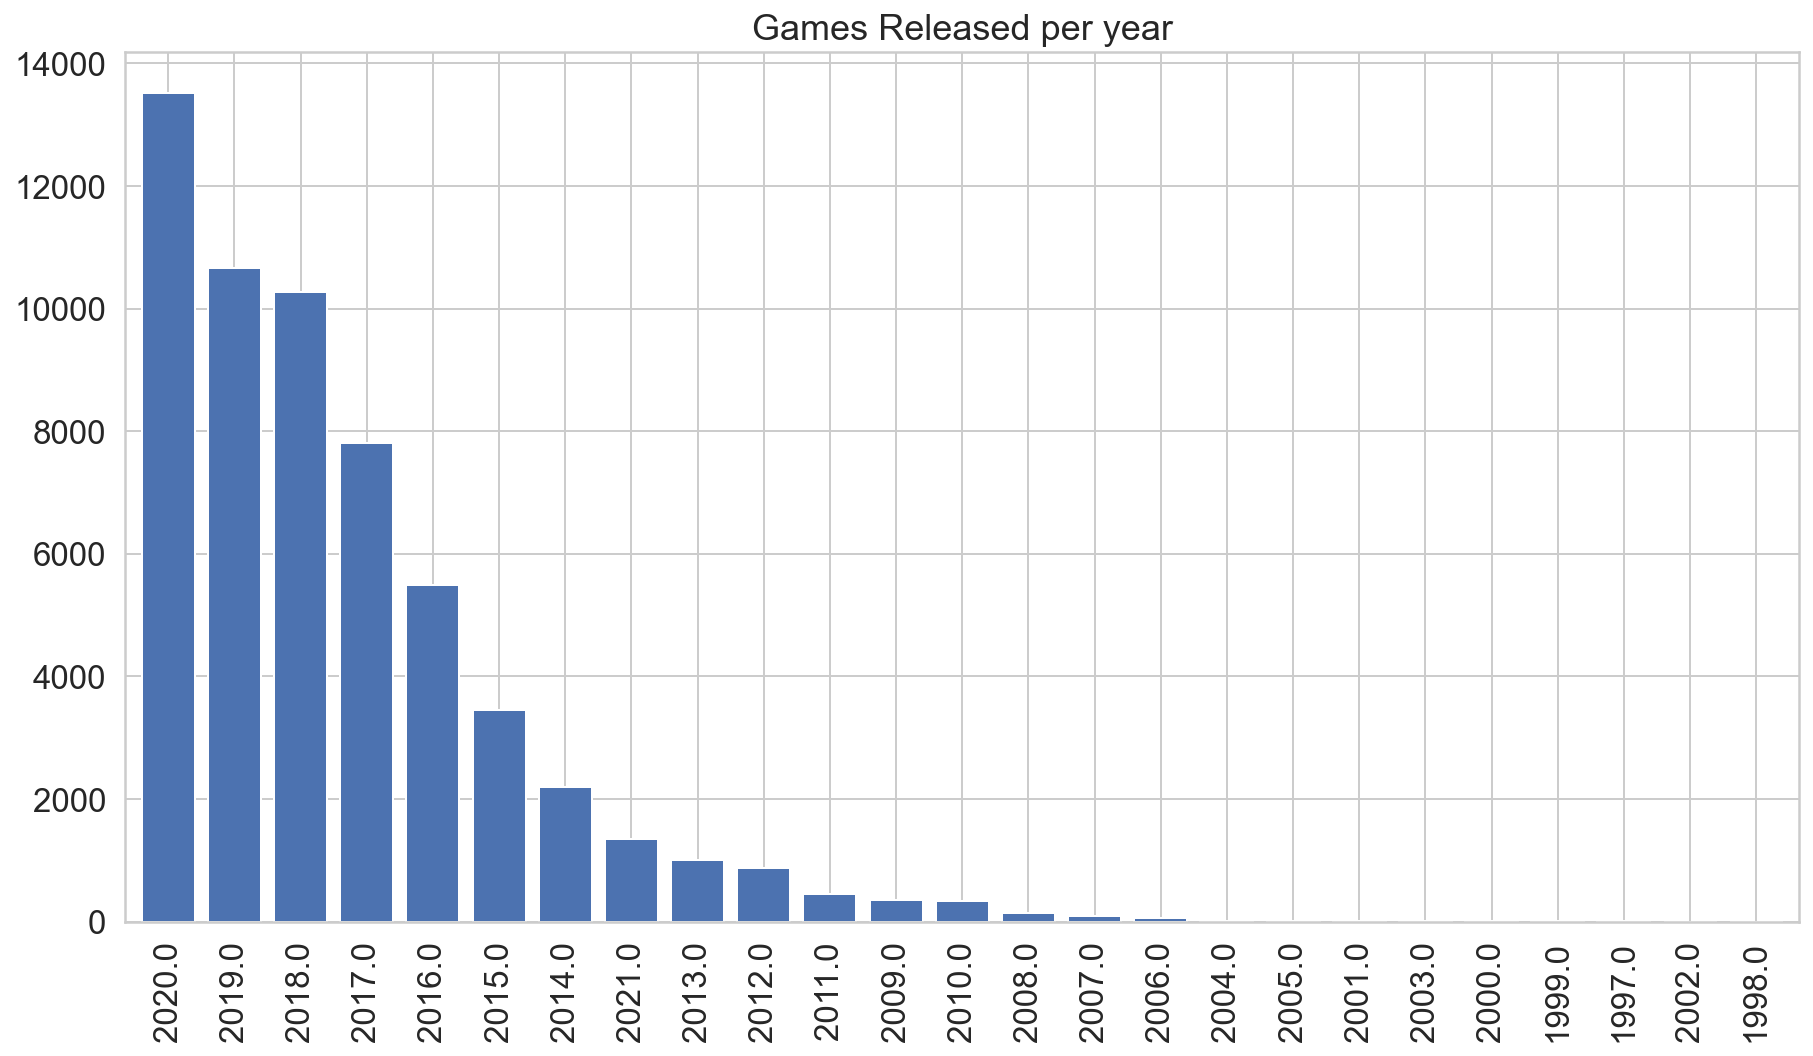

In [56]:
fig = gamedf['rel_year'].value_counts().plot.bar(title = 'Games Released per year', figsize=(15,8), width=0.8)
plt.show()

In [57]:
#quickly save df
#joblib.dump(gamedf, 'data/gamedf_data_eda')

## EDA of Reviews Dataset

In [80]:
reviewdf = joblib.load('/Users/alison/DS-Projects/SteamCapstone/Capstone Steam/Cleaned/data/clean_dlc_reviews.joblib')

In [109]:
reviewdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76530 entries, 0 to 76583
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   app_id               76530 non-null  int64         
 1   dlc                  76530 non-null  int64         
 2   recommendationid     76530 non-null  object        
 3   review               76530 non-null  object        
 4   voted_up             76530 non-null  object        
 5   votes_up             76530 non-null  float64       
 6   votes_funny          76530 non-null  float64       
 7   weighted_vote_score  76530 non-null  float64       
 8   review_created       76530 non-null  datetime64[ns]
 9   review_updated       76530 non-null  datetime64[ns]
 10  review_year          76530 non-null  int64         
 11  steamid              76530 non-null  object        
 12  num_games_owned      76530 non-null  int64         
 13  num_reviews          76530 non-

In [113]:
reviewdf.head()

,app_id,dlc,recommendationid,review,voted_up,votes_up,votes_funny,weighted_vote_score,review_created,review_updated,review_year,steamid,num_games_owned,num_reviews,rating,helpful,review_length
0,1256,1,23698284,"I got this back in 2010 and it was around $2, ...",False,51.0,1.0,0.781742,2016-06-22 03:34:47,2016-06-22 03:34:47,2016,76561197963558222,251,15,negative,helpful,175
1,1256,1,13871472,DJ Scully nuff said.,True,23.0,4.0,0.707484,2015-01-06 22:47:16,2015-01-06 22:47:16,2015,76561198044217796,125,8,positive,helpful,20
2,1256,1,2722792,These Killing Floor characters really adds to ...,True,22.0,2.0,0.659986,2011-12-09 03:54:38,2011-12-09 03:54:38,2011,76561198011647032,11679,502,positive,helpful,963
3,1256,1,15154600,Guy in a HaZmat suit... cool Some guy with som...,True,7.0,10.0,0.593850,2015-04-01 13:25:40,2015-04-01 13:25:40,2015,76561198023430257,489,302,positive,helpful,174
4,1256,1,640873,This DLC has the best looking character models...,True,9.0,0.0,0.591672,2010-12-15 01:26:52,2010-12-15 01:26:52,2010,76561197973951600,425,21,positive,helpful,61


In [114]:
reviewdf.drop(columns =['dlc'], inplace=True )

In [82]:
reviewdf['review_length'] = reviewdf['review'].map(lambda x: len(x))

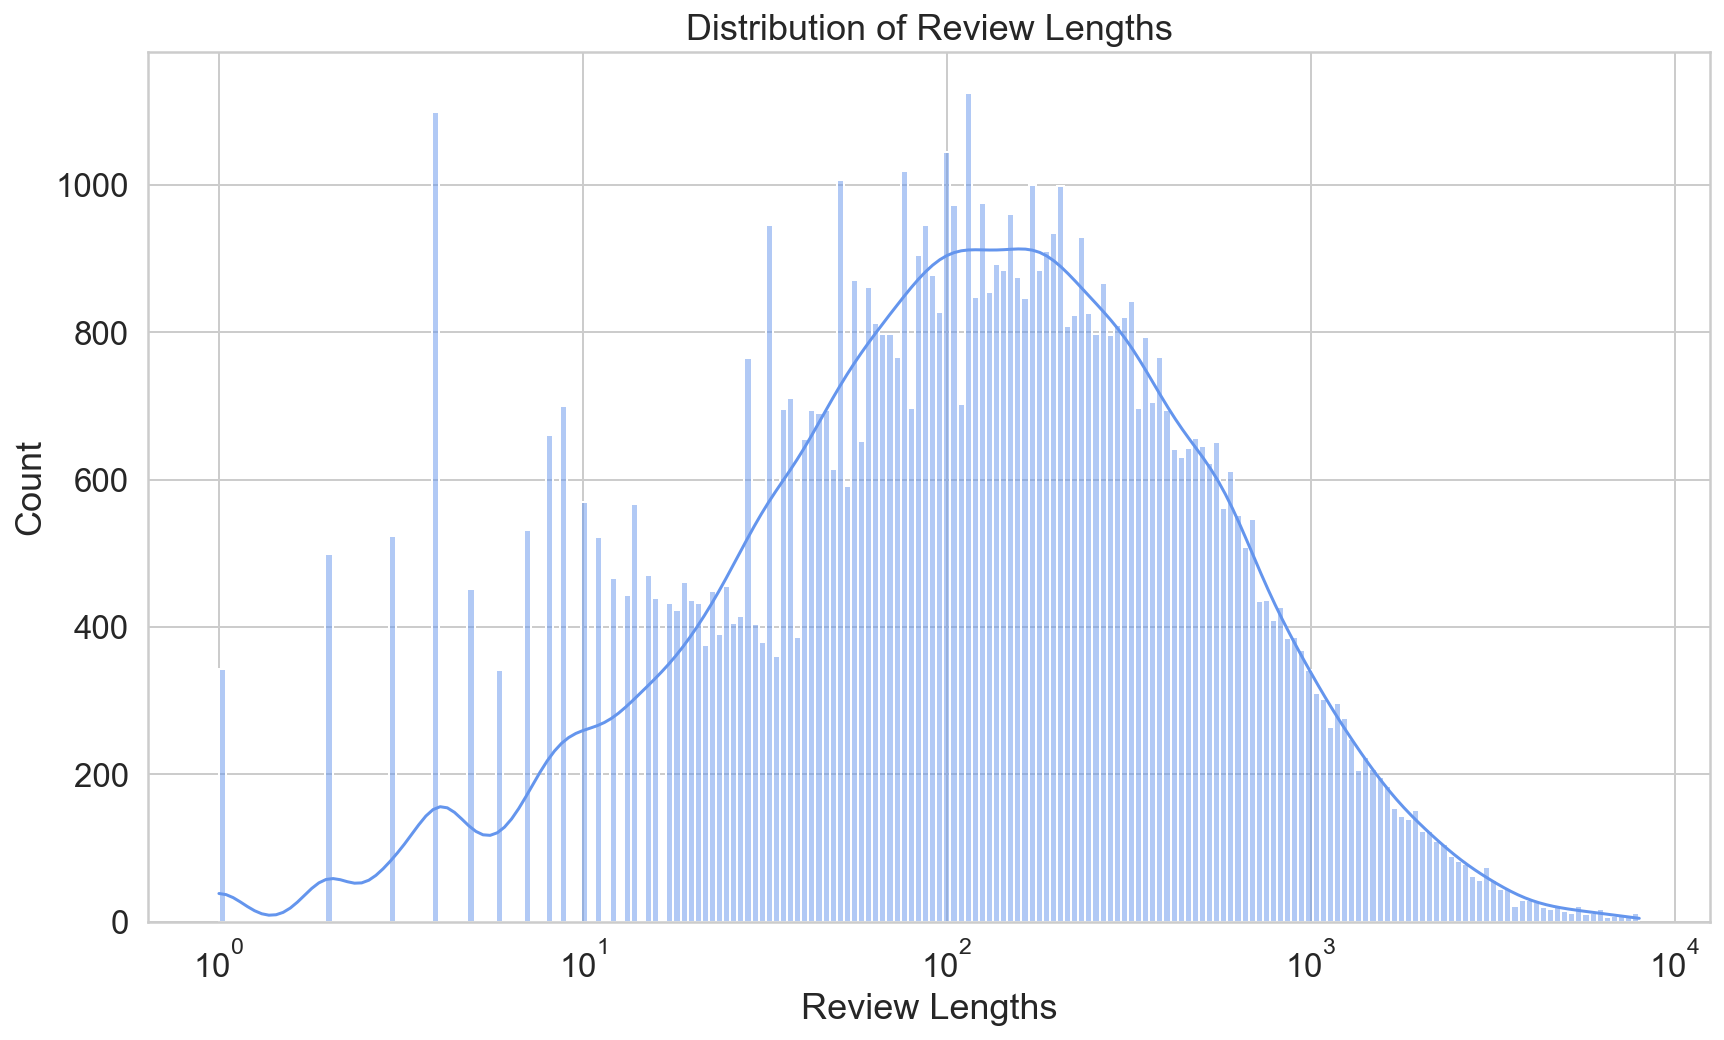

In [91]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(reviewdf, x='review_length', ax=ax, color='cornflowerblue', bins=200, log_scale=True, kde=True)
ax.set_xlabel('Review Lengths')
ax.set_ylabel('Count')
ax.set_title('Distribution of Review Lengths')
plt.show()

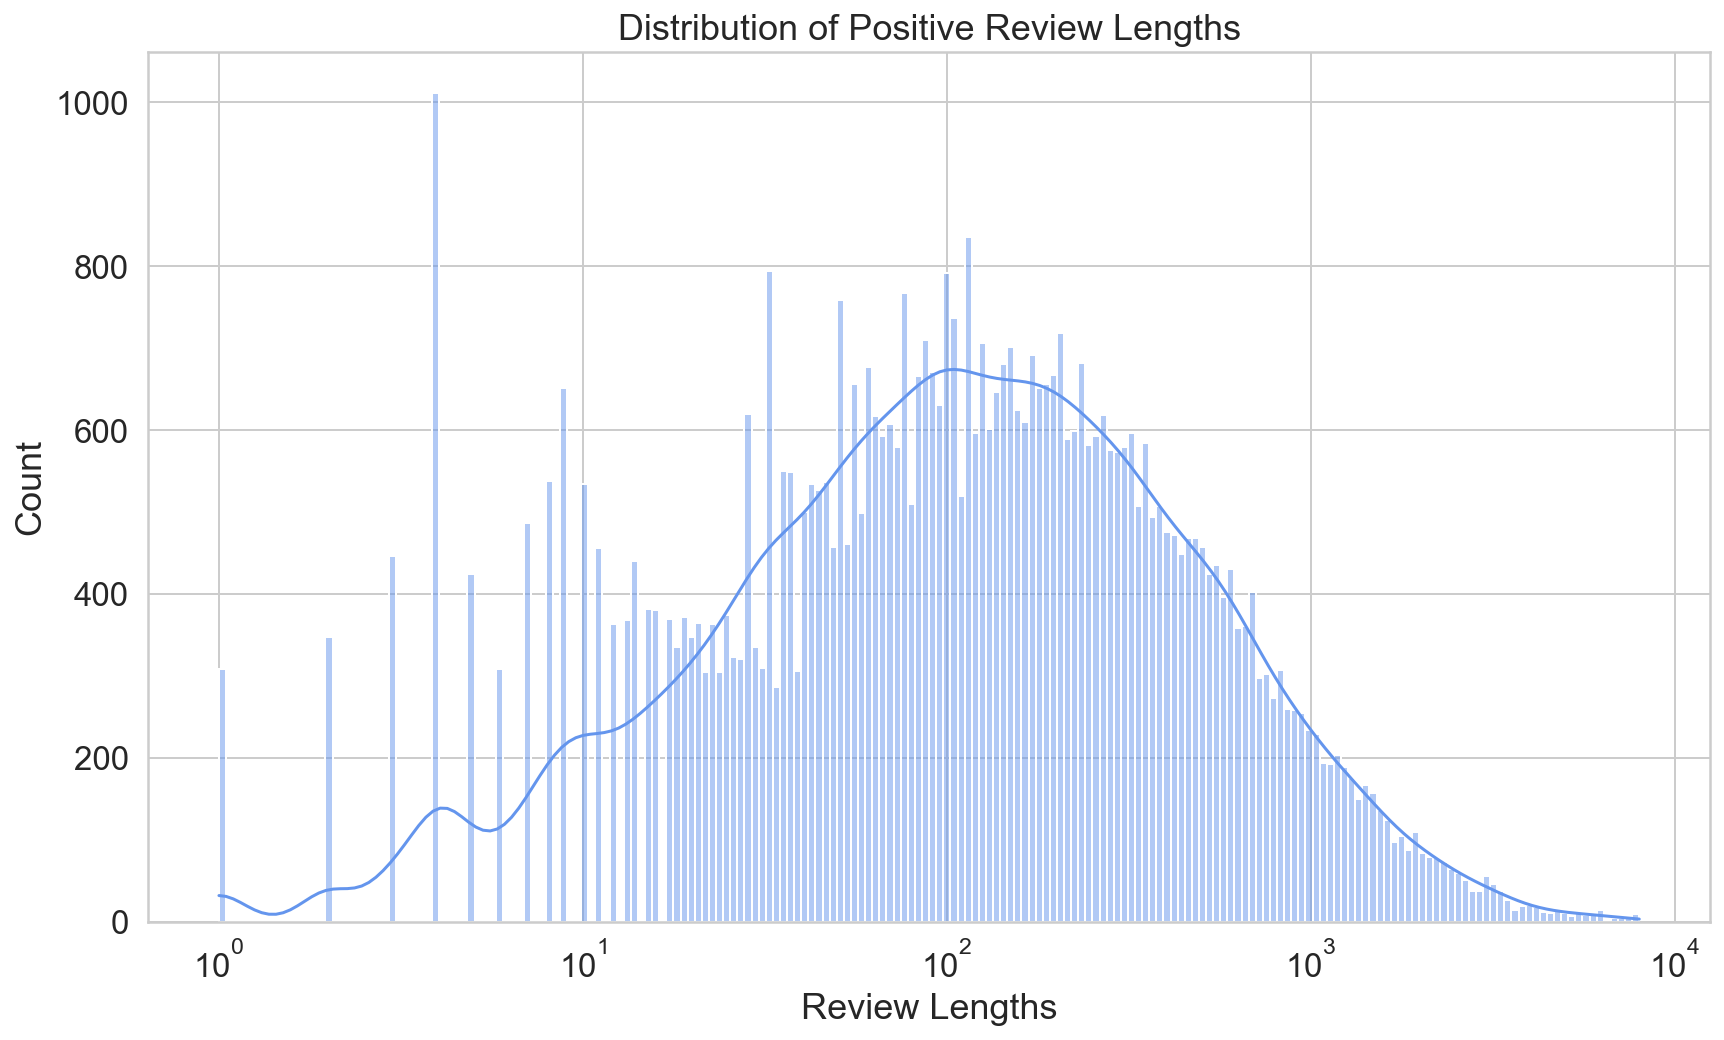

In [92]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(reviewdf[reviewdf.rating == 'positive'], x='review_length', ax=ax, bins=200, log_scale = True, 
             color='cornflowerblue', kde=True)
ax.set_xlabel('Review Lengths')
ax.set_ylabel('Count')
ax.set_title('Distribution of Positive Review Lengths')
plt.show()

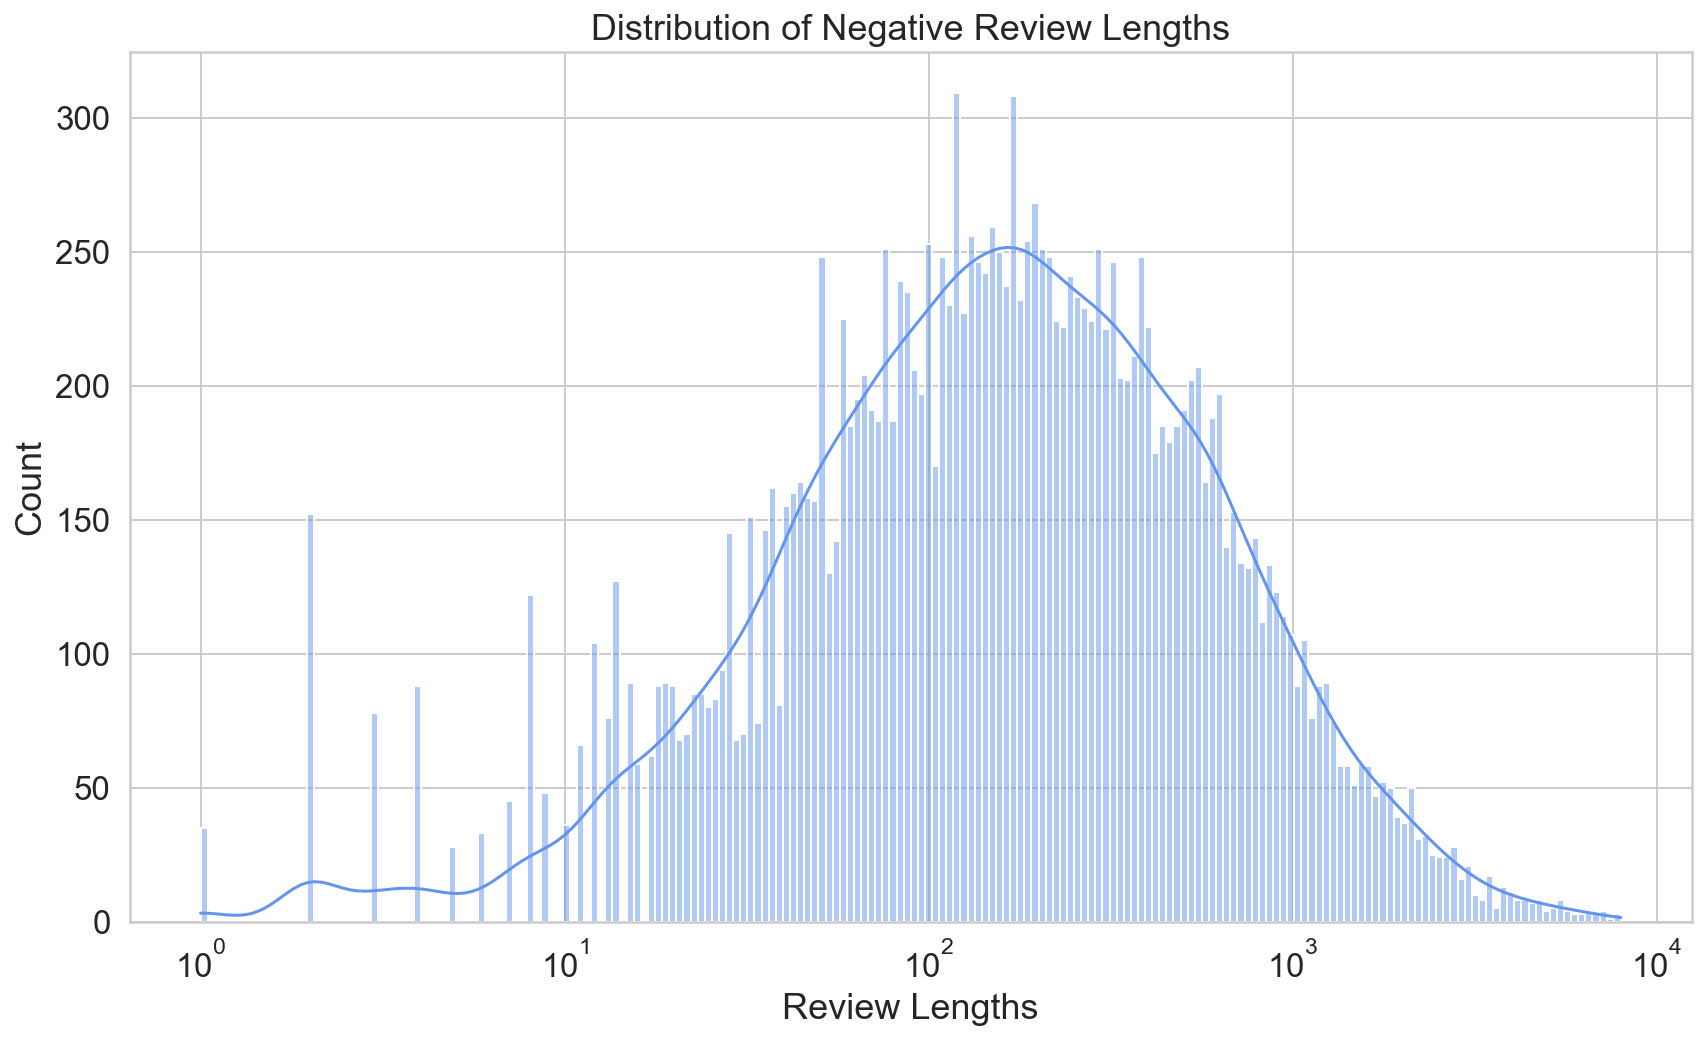

In [93]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(reviewdf[reviewdf.rating == 'negative'], x='review_length', ax=ax, bins=200, log_scale=True,
            color='cornflowerblue', kde=True)
ax.set_xlabel('Review Lengths')
ax.set_ylabel('Count')
ax.set_title('Distribution of Negative Review Lengths')
plt.show()

Avg review length around 80-300, negative reviews tend to be longer

Text(0.5, 1.0, 'Length of Reviews by Year')

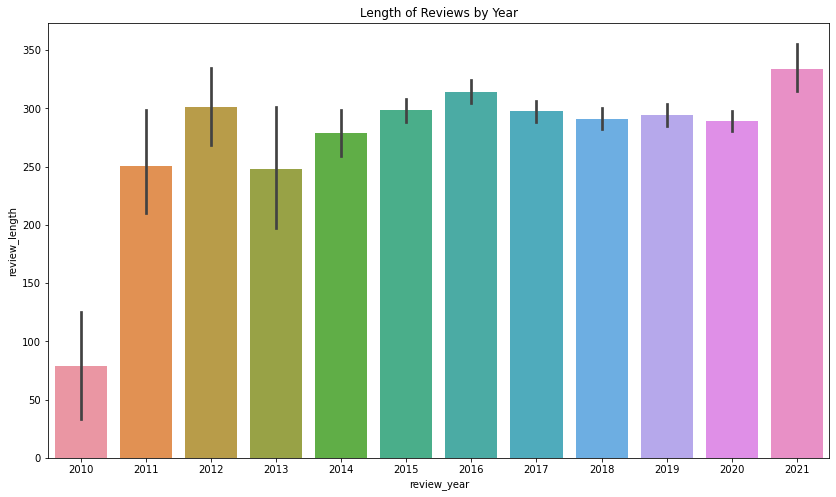

In [73]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x="review_year", y="review_length", data=reviewdf)
ax.set_title('Length of Reviews by Year')

Text(0.5, 1.0, 'Number of helpful voted reviews by Year')

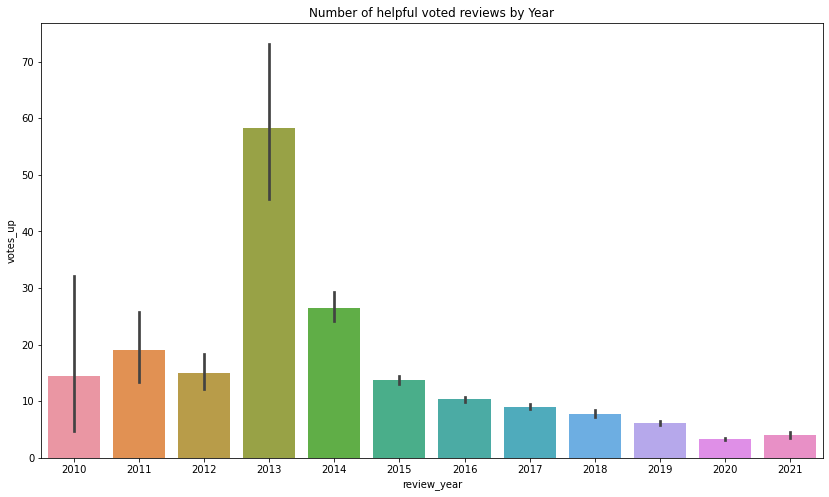

In [74]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x="review_year", y="votes_up", data=reviewdf)
ax.set_title('Number of helpful votes on reviews by Year')

Text(0.5, 1.0, 'Number of positive reviews by Year')

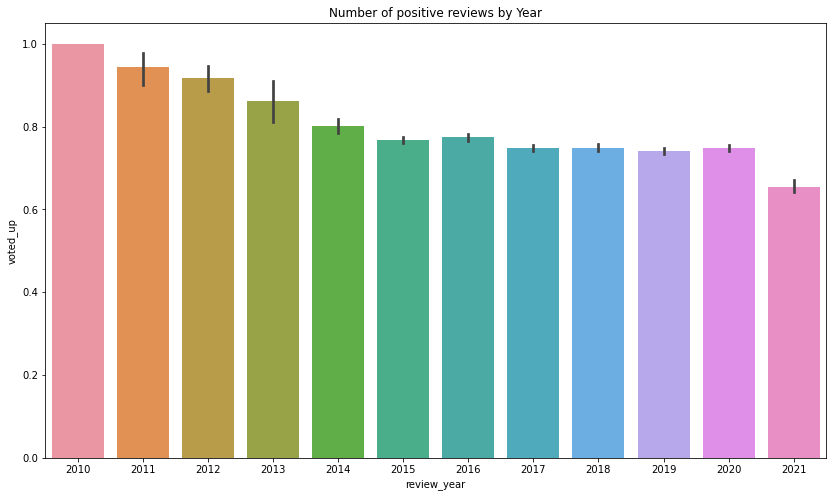

In [75]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x="review_year", y="voted_up", data=reviewdf)
ax.set_title('Number of positive reviews by Year')

Text(0.5, 1.0, 'Number of reviews by Year')

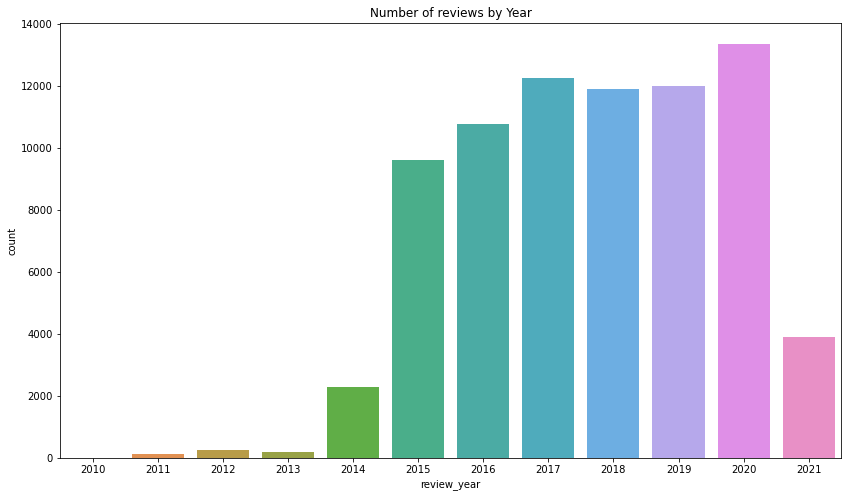

In [77]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x='review_year', data=reviewdf)
ax.set_title('Number of reviews by Year')

Text(0.5, 1.0, 'Number of reviews by Year')

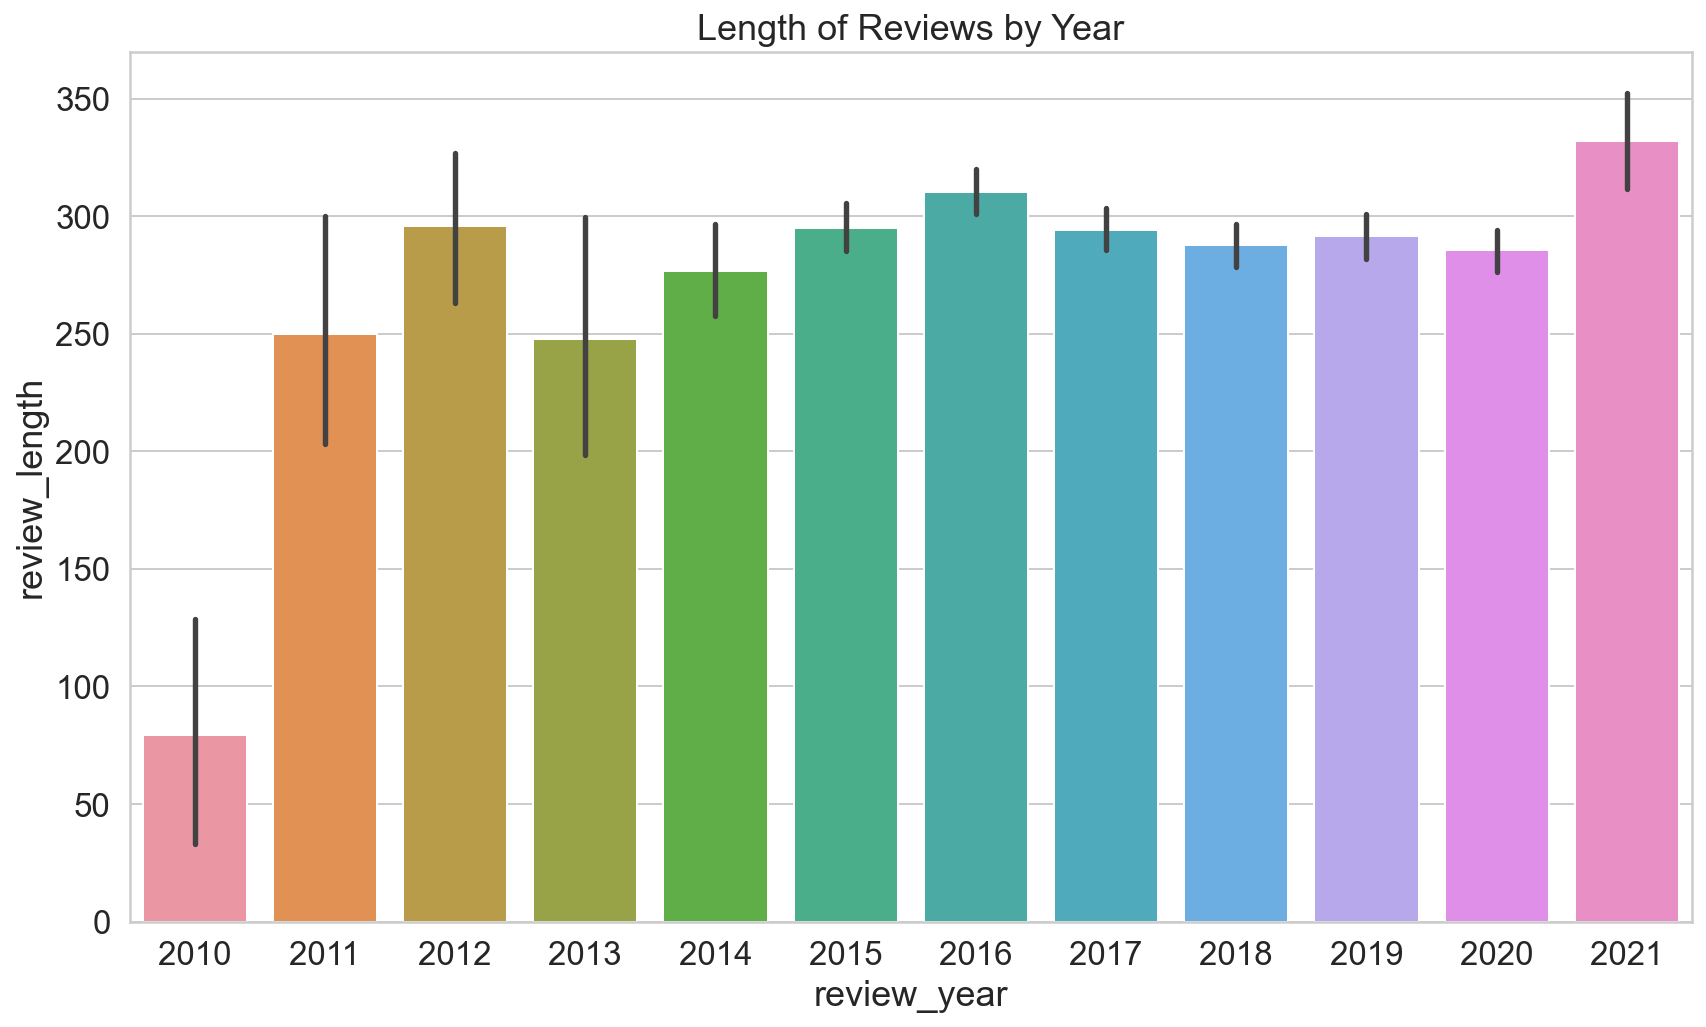

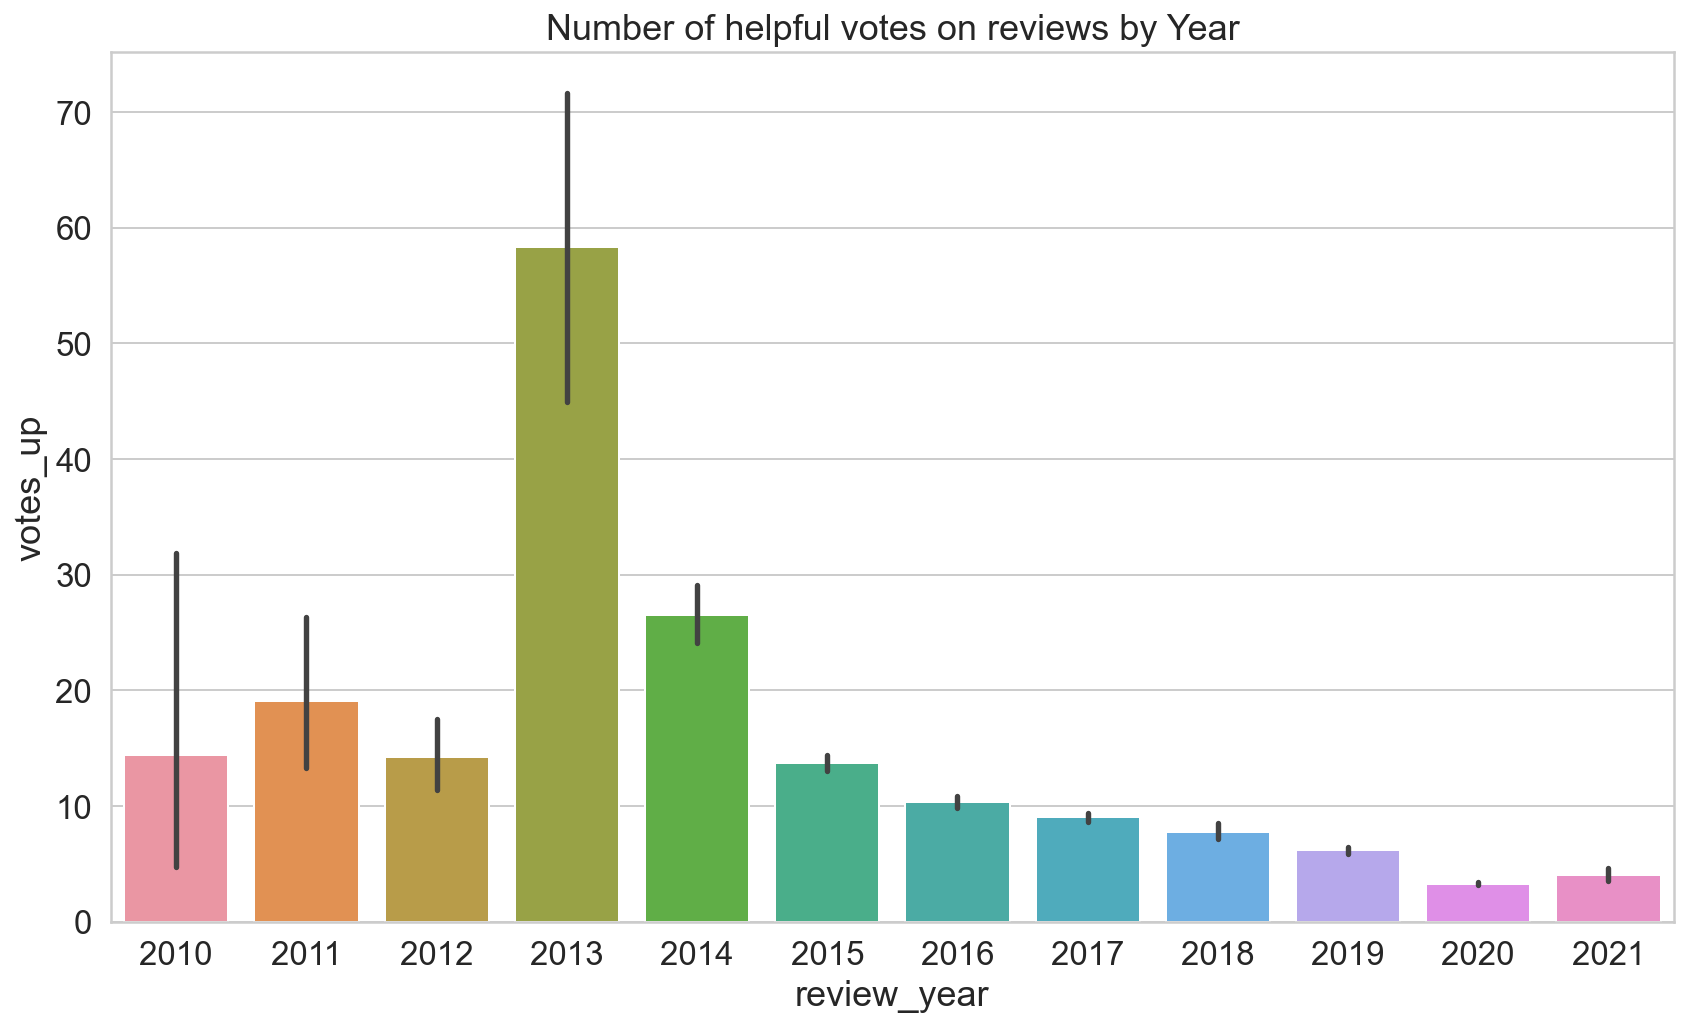

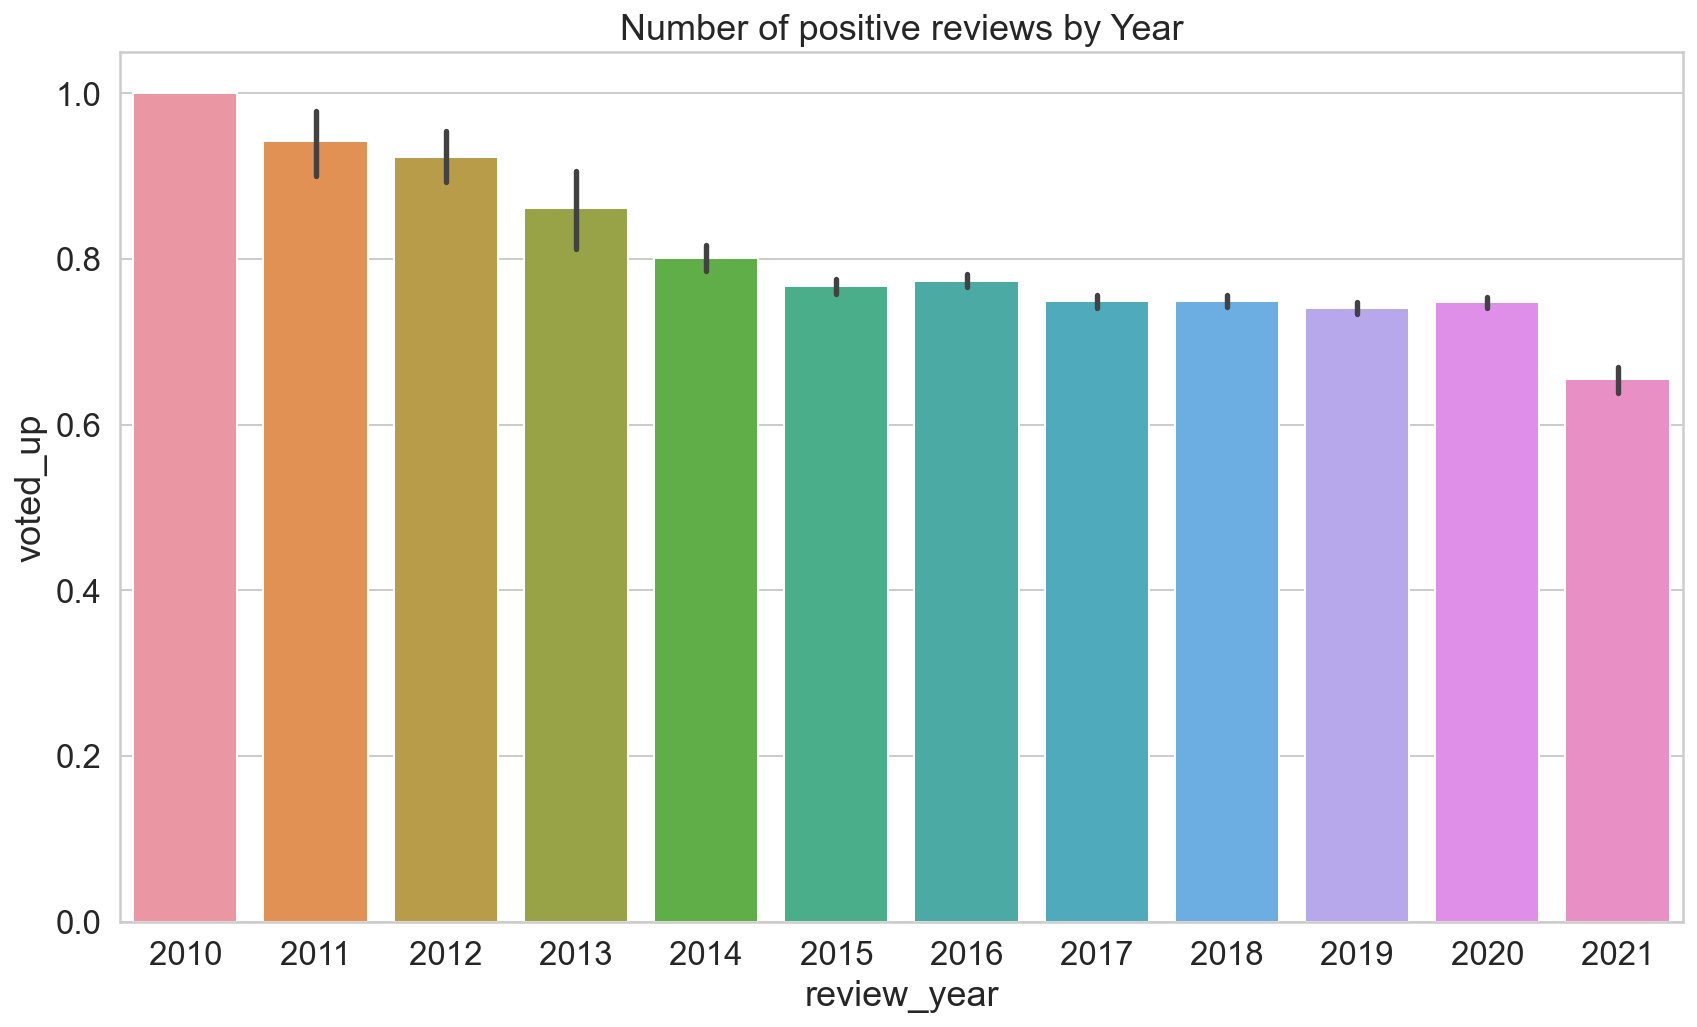

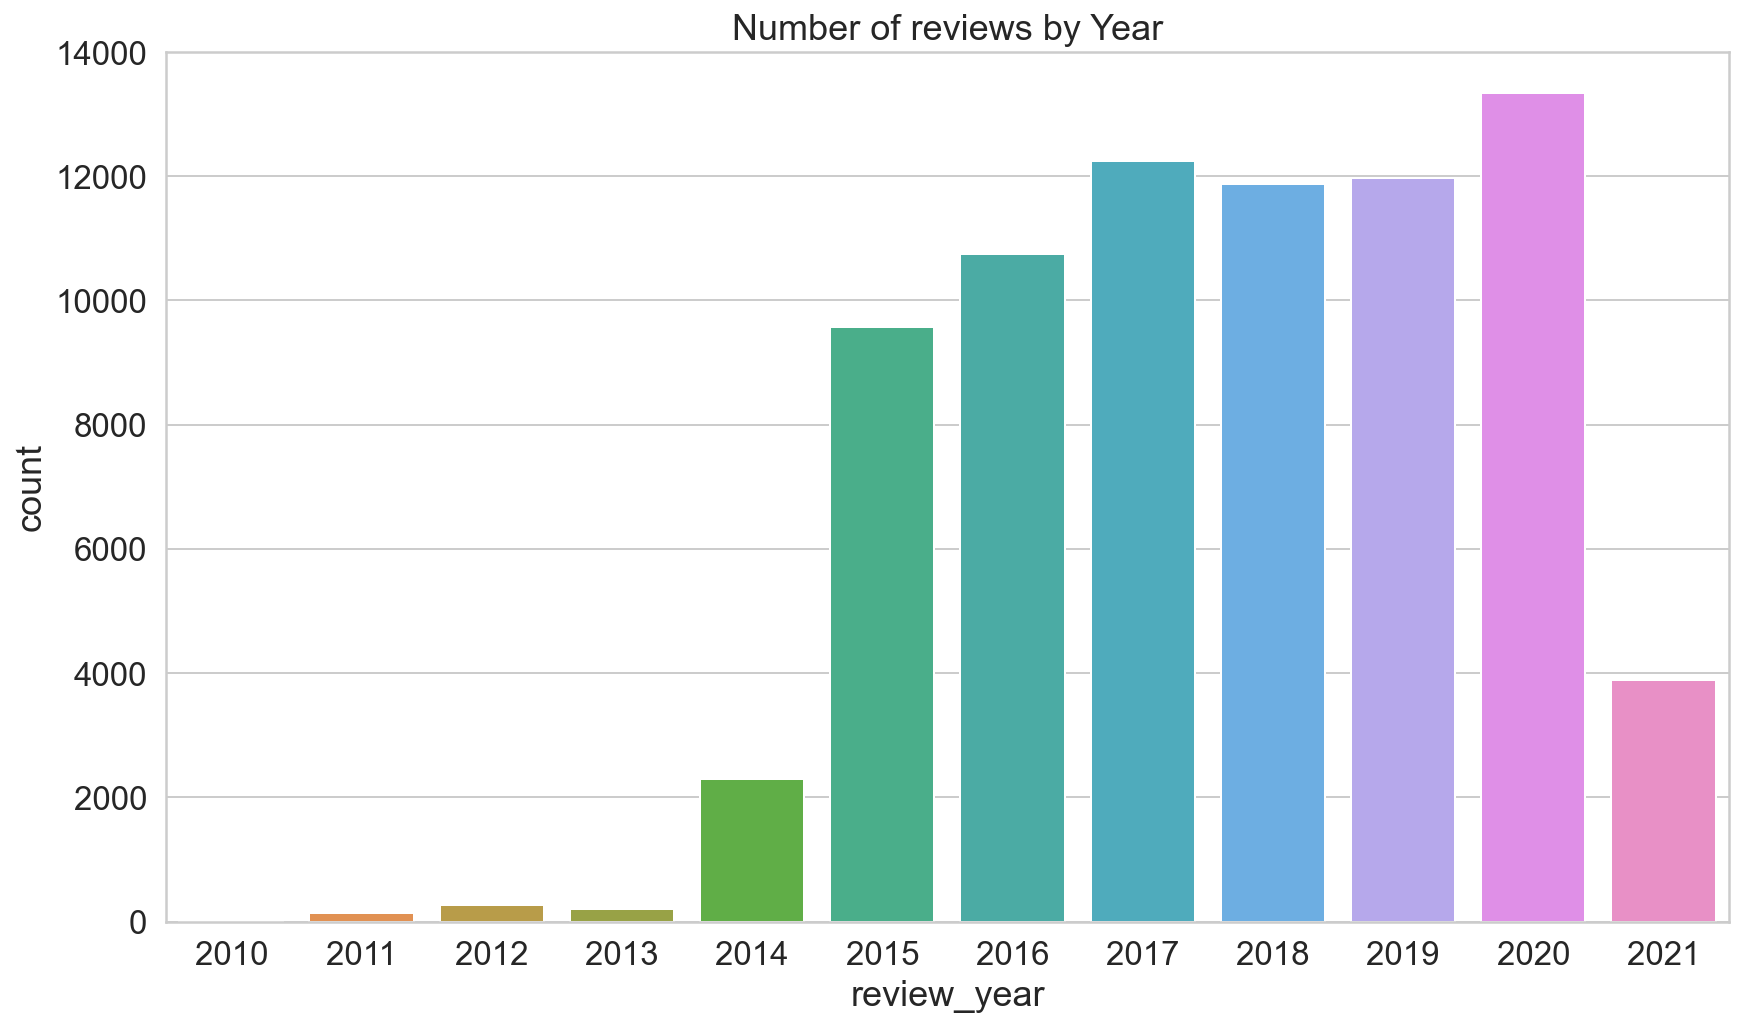

In [96]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x="review_year", y="review_length", data=reviewdf)
ax.set_title('Length of Reviews by Year')

fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x="review_year", y="votes_up", data=reviewdf)
ax.set_title('Number of helpful votes on reviews by Year')

fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x="review_year", y="voted_up", data=reviewdf)
ax.set_title('Number of positive reviews by Year')

fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x='review_year', data=reviewdf)
ax.set_title('Number of reviews by Year')

In [ ]:
p = reviewdf.select_dtypes(include = ['int64', 'float64', object])         

sns.pairplot(p.loc[:, p.columns != 'voted_up'])

Text(0.5, 1.08, 'Games owned vs num reviews')

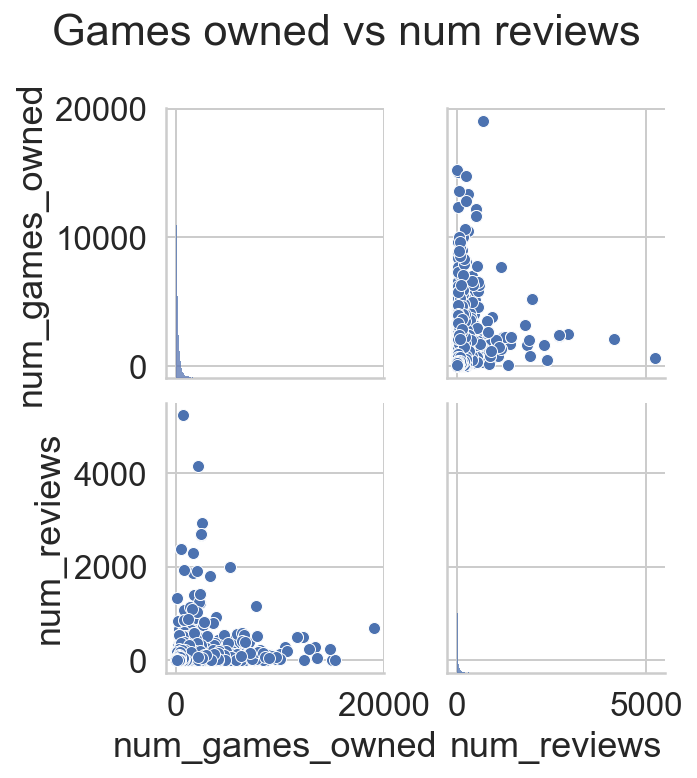

In [106]:
#Create a dataframe with unique authors to take a look at the reviewers in my dataset
#authors = steamid	num_games_owned	num_reviews
users = reviewdf[['steamid', 'num_games_owned', 'num_reviews']].drop_duplicates()
g = sns.pairplot(users)
g.fig.suptitle("Games owned vs num reviews", y=1.08)
plt.show()

In [108]:
reviewdf.select_dtypes(exclude='bool')

,app_id,dlc,recommendationid,review,voted_up,votes_up,votes_funny,weighted_vote_score,review_created,review_updated,review_year,steamid,num_games_owned,num_reviews,rating,helpful,review_length
0,1256,1,23698284,"I got this back in 2010 and it was around $2, ...",False,51.0,1.0,0.781742,2016-06-22 03:34:47,2016-06-22 03:34:47,2016,76561197963558222,251,15,negative,helpful,175
1,1256,1,13871472,DJ Scully nuff said.,True,23.0,4.0,0.707484,2015-01-06 22:47:16,2015-01-06 22:47:16,2015,76561198044217796,125,8,positive,helpful,20
2,1256,1,2722792,These Killing Floor characters really adds to ...,True,22.0,2.0,0.659986,2011-12-09 03:54:38,2011-12-09 03:54:38,2011,76561198011647032,11679,502,positive,helpful,963
3,1256,1,15154600,Guy in a HaZmat suit... cool Some guy with som...,True,7.0,10.0,0.593850,2015-04-01 13:25:40,2015-04-01 13:25:40,2015,76561198023430257,489,302,positive,helpful,174
4,1256,1,640873,This DLC has the best looking character models...,True,9.0,0.0,0.591672,2010-12-15 01:26:52,2010-12-15 01:26:52,2010,76561197973951600,425,21,positive,helpful,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76579,933720,1,45841037,why is it not possible to start the editor in ...,False,0.0,0.0,0.000000,2018-11-16 13:37:08,2018-11-16 13:37:08,2018,76561198030898107,242,1,negative,not-helpful,125
76580,933720,1,45826987,in game editor not working for fm 19,False,0.0,0.0,0.000000,2018-11-15 15:45:01,2018-11-15 15:45:01,2018,76561198275276245,9,1,negative,not-helpful,37
76581,933720,1,45794849,i cant see the DLC,False,0.0,1.0,0.000000,2018-11-13 13:06:08,2018-11-13 13:06:08,2018,76561198312901196,23,5,negative,not-helpful,18
76582,933720,1,45747181,"It doesn't show in chart, why???!!!",False,0.0,1.0,0.000000,2018-11-10 19:23:34,2018-11-10 19:23:34,2018,76561198124711217,9,1,negative,not-helpful,35
